# Import Libraries

In [1]:
# Import the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Hide warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set rows and cols option for pandas
pd.set_option("display.max_rows", 200)
pd.set_option('display.max_columns', 500)

# Load data / check its structure / metadata

In [4]:
# Read the csv files
leads = pd.read_csv('Leads.csv', on_bad_lines='skip')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [5]:
# Identifying the shape of leads data frame
leads.shape

(9240, 37)

In [6]:
# Check info of leads dataset
# We will set verbose True to print the full summary
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Describe numberical columns
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Handle missing values and remove unnecessary features

In [8]:
# We don't need the column "Prospect ID" and "Lead Number" as they are for identification of individual rows

leads.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

In [9]:
# Check the percentage of missing values in each column
# Sort them in descending order
percentage_of_null_values = leads.isnull().sum()/len(leads.index) * 100
percentage_of_null_values = percentage_of_null_values.sort_values(ascending=False)
percentage_of_null_values

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [10]:
# Get all columns with percentage of missing values greater than 40
# Print total number of columns with missing values greater than 40

null_greater_than_40 =  percentage_of_null_values[percentage_of_null_values > 40]
print(null_greater_than_40)
print('='*50)
print('Total count of columns - ', len(null_greater_than_40))

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Score     45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
dtype: float64
Total count of columns -  5


In [11]:
# null_greater_than_40.index.tolist() will give us all the columns names with missing value greater than 40
# Drop all columns where percentage of missing value is greater than 40
# inplace=True will drop these columns from the application dataframe
# we are left with 73 columns
leads.drop(null_greater_than_40.index.tolist(), axis=1, inplace=True)
leads.shape

(9240, 30)

In [12]:
missing_values = leads.isnull().sum()/len(leads.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 0]

# Before we proceed with our analysis, let handle the missing values for below columns

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [13]:
# Lets handle missing values in Tags
# We will impute the missing values with 'Missing'

print(leads["Tags"].value_counts(normalize=True, dropna=False).head() * 100)
print("-"*100)

leads["Tags"] = leads["Tags"].apply(lambda x: 'Missing' if x is np.NaN else x)
leads["Tags"].value_counts().head()

NaN                                    36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Already a student                       5.032468
Name: Tags, dtype: float64
----------------------------------------------------------------------------------------------------


Missing                                3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

In [14]:
# Lets handle missing values in "Lead Profile"
# As we see more than 60 percent of the values are not selected, we will drop this column

print(leads["Lead Profile"].value_counts(normalize=True).head() * 100)
leads.drop("Lead Profile", axis=1, inplace=True)

Select                   63.481856
Potential Lead           24.697596
Other Leads               7.456745
Student of SomeSchool     3.690093
Lateral Student           0.367478
Name: Lead Profile, dtype: float64


In [15]:
# Lets handle missing values in "What matters most to you in choosing a course"
# Column "What matters most to you in choosing a course" is highly biased towards a single category hence we will drop it

print(leads["What matters most to you in choosing a course"].value_counts(normalize=True).head() * 100)
leads.drop("What matters most to you in choosing a course", axis=1, inplace=True)

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64


In [16]:
# Lets handle missing values in "What is your current occupation"
# We will impute the null values with most occuring value 'Unemployed'

print(leads["What is your current occupation"].value_counts(normalize=True, dropna=False).head() * 100)
print("-"*100)

leads["What is your current occupation"] = leads["What is your current occupation"].apply(lambda x: 'Unemployed' if x is np.NaN else x)
leads["What is your current occupation"].value_counts().head()

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Name: What is your current occupation, dtype: float64
----------------------------------------------------------------------------------------------------


Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

In [17]:
# Lets handle missing values in "Country"
# We will impute the null values with most occuring value 'India'

print(leads["Country"].value_counts(normalize=True, dropna=False).head() * 100)
print("-"*100)

leads["Country"] = leads["Country"].apply(lambda x: 'Missing' if x is np.NaN else x)
leads["Country"] = leads["Country"].apply(lambda x: 'Others' if not x in ['India', 'Missing'] else x)
leads["Country"].value_counts().head()

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Name: Country, dtype: float64
----------------------------------------------------------------------------------------------------


India      6492
Missing    2461
Others      287
Name: Country, dtype: int64

In [18]:
# Lets handle missing values in "How did you hear about X Education"
# As we see more than 50 percent of the values are not selected, we will drop this column

print(leads["How did you hear about X Education"].value_counts(normalize=True, dropna=False).head() * 100)
print("-"*100)
leads.drop("How did you hear about X Education", axis=1, inplace=True)

Select                   54.577922
NaN                      23.885281
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Name: How did you hear about X Education, dtype: float64
----------------------------------------------------------------------------------------------------


In [19]:
# Lets handle missing values in "Specialization"
# We see more than 35 of the values are missing hence we will impute missing values with 'Missing'

print(leads["Specialization"].value_counts(normalize=True, dropna=False).head() * 100)
print("-"*100)

leads["Specialization"] = leads["Specialization"].apply(lambda x: 'Missing' if x is np.NaN or x == 'Select' else x)
leads["Specialization"].value_counts().head()

Select                       21.017316
NaN                          15.562771
Finance Management           10.562771
Human Resource Management     9.177489
Marketing Management          9.069264
Name: Specialization, dtype: float64
----------------------------------------------------------------------------------------------------


Missing                      3380
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [20]:
# Lets handle missing values in "City"
# We will impute City with most occuring City 'Mumbai'

print(leads["City"].value_counts(normalize=True, dropna=False).head() * 100)
print("-"*100)

leads["City"] = leads["City"].apply(lambda x: 'Mumbai' if x is np.NaN or x == 'Select' else x)
leads["City"].value_counts().head()

Mumbai               34.870130
Select               24.339827
NaN                  15.367965
Thane & Outskirts     8.138528
Other Cities          7.424242
Name: City, dtype: float64
----------------------------------------------------------------------------------------------------


Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Name: City, dtype: int64

In [21]:
# Lets handle missing values in "TotalVisits", "Page Views Per Visit", "Last Activity", "Lead Source"

missing_values = leads.isnull().sum()/len(leads.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 0]

# As missing value for these columns is less than 2 percent we can drop these missing values

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

In [22]:
leads.dropna(inplace = True)

missing_values = leads.isnull().sum()/len(leads.index) * 100
missing_values = missing_values.sort_values(ascending=False)
missing_values[missing_values > 0]

Series([], dtype: float64)

# Handle Outlier for Numeric fields

In [23]:
# Converted has min and max range between 0-1

leads.describe()

Converted  TotalVisits  Total Time Spent on Website  \
count  9074.000000  9074.000000                  9074.000000   
mean      0.378554     3.456028                   482.887481   
std       0.485053     4.858802                   545.256560   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    11.000000   
50%       0.000000     3.000000                   246.000000   
75%       1.000000     5.000000                   922.750000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
max               55.000000

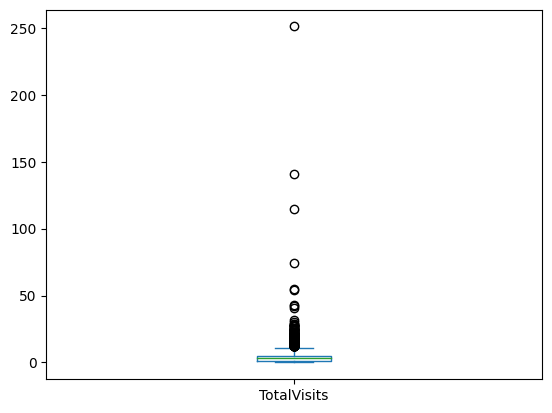

In [24]:
# Let check outliers for TotalVisits
# Seems there are few outliers, lets replace these outliers using mean

leads["TotalVisits"].plot.box()
leads.TotalVisits = leads.TotalVisits.apply(lambda x: leads.TotalVisits.mean().round() if x > 50 else x)

<Axes: >

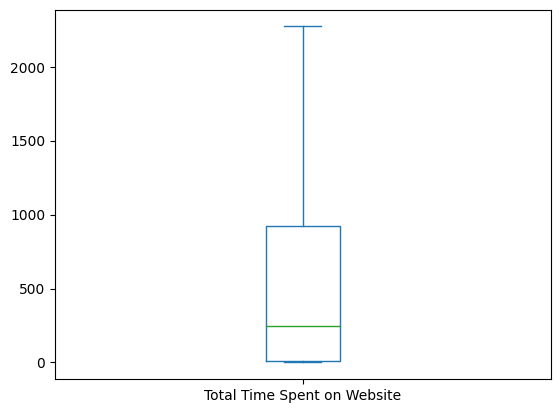

In [25]:
# Let check outliers for Total Time Spent on Website
# The plot look gradual which means there are no outliers

leads["Total Time Spent on Website"].plot.box()

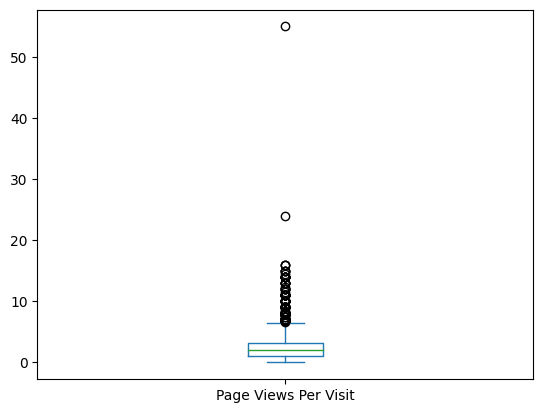

In [26]:
# Let check outliers for Page Views Per Visit
# Seems there are few outliers, lets replace these outliers using mean

leads["Page Views Per Visit"].plot.box()
leads["Page Views Per Visit"] = leads["Page Views Per Visit"].apply(lambda x: leads["Page Views Per Visit"].mean().round() if x > 20 else x)

# Univariate Analysis

In [27]:
sns.set_style('whitegrid')
sns.set_context('talk')

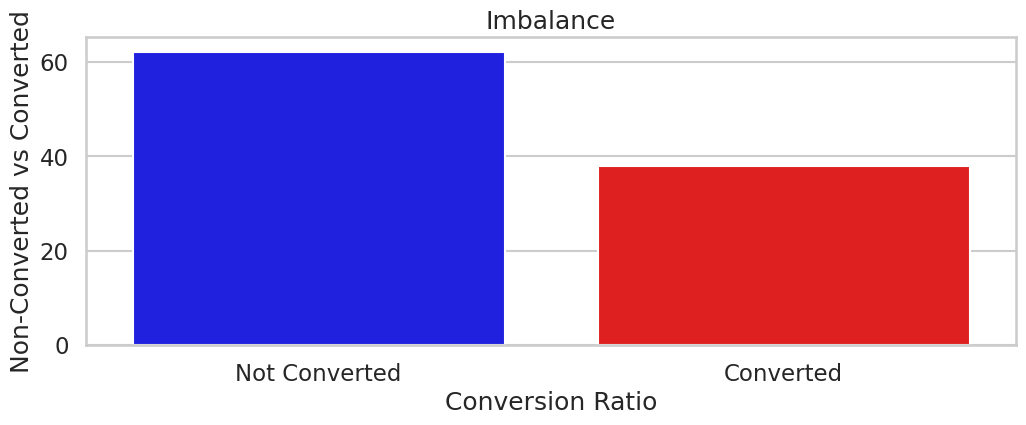

In [28]:
# Now we will perform Imbalance Analysis
unique_values = data = leads["Converted"].value_counts(normalize=True).reset_index() * 100

plt.figure(figsize=(12,4))
x= ['Not Converted','Converted']
sns.barplot(data = unique_values, x=x, y ="Converted",palette= ['b','r'])
plt.xlabel("Conversion Ratio")
plt.ylabel("Non-Converted vs Converted")
plt.title("Imbalance")
plt.show()

# We can see from the below plot that the conversion ration is close to 40 percent

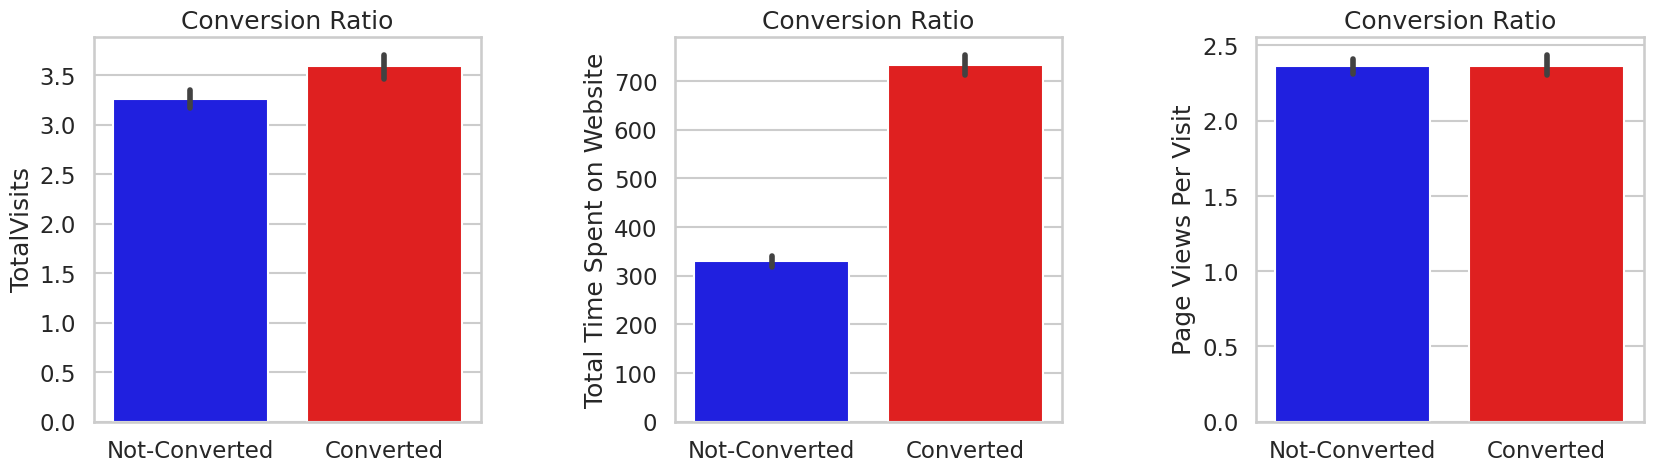

In [29]:
# Let check the conversion ration of numeric variables using bar plot

numeric_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
fig = plt.figure(figsize=(20,5))
for idx, item in enumerate(numeric_vars):
    plt.subplot(1,3,idx+1)
    plt.subplots_adjust(wspace=0.5)
    x=[0, 1]
    sns.barplot(data=leads , x="Converted", y=item, palette= ['b','r'])
    plt.xticks(x, ['Not-Converted', 'Converted'])
    plt.xlabel("")
    plt.title("Conversion Ratio")
plt.show()

# We see that Total time spent on website is high for the converted leads
# Page views per visit has no significant impact on conversion rate
# Total visit is marginally higher for converted leads

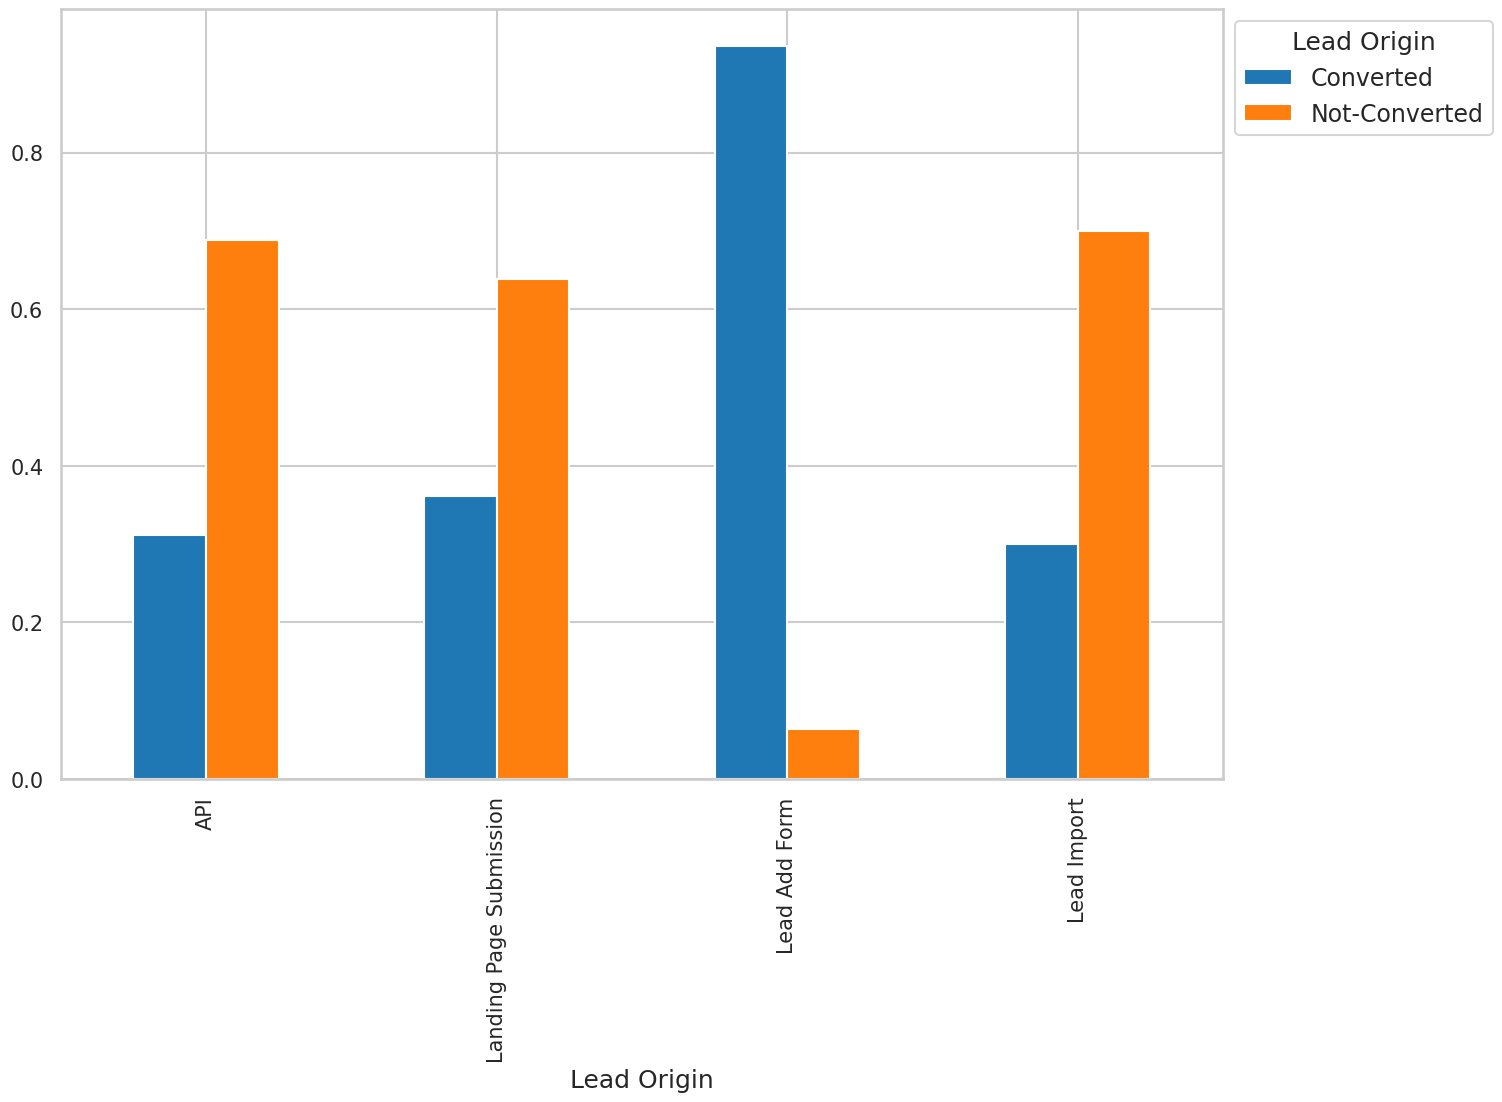

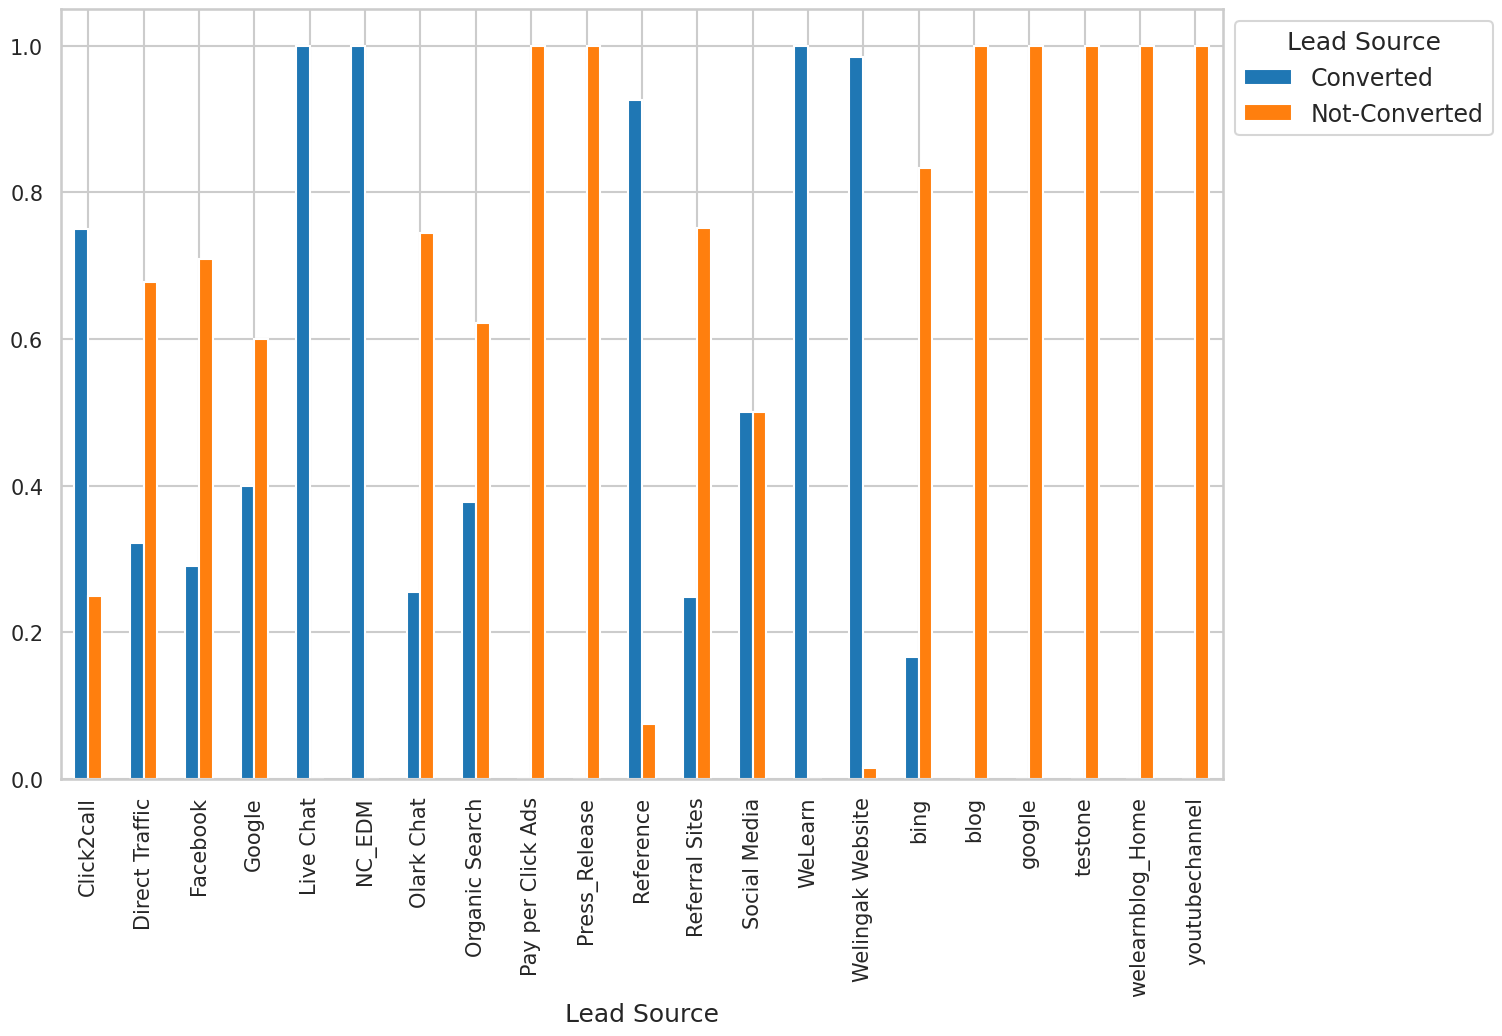

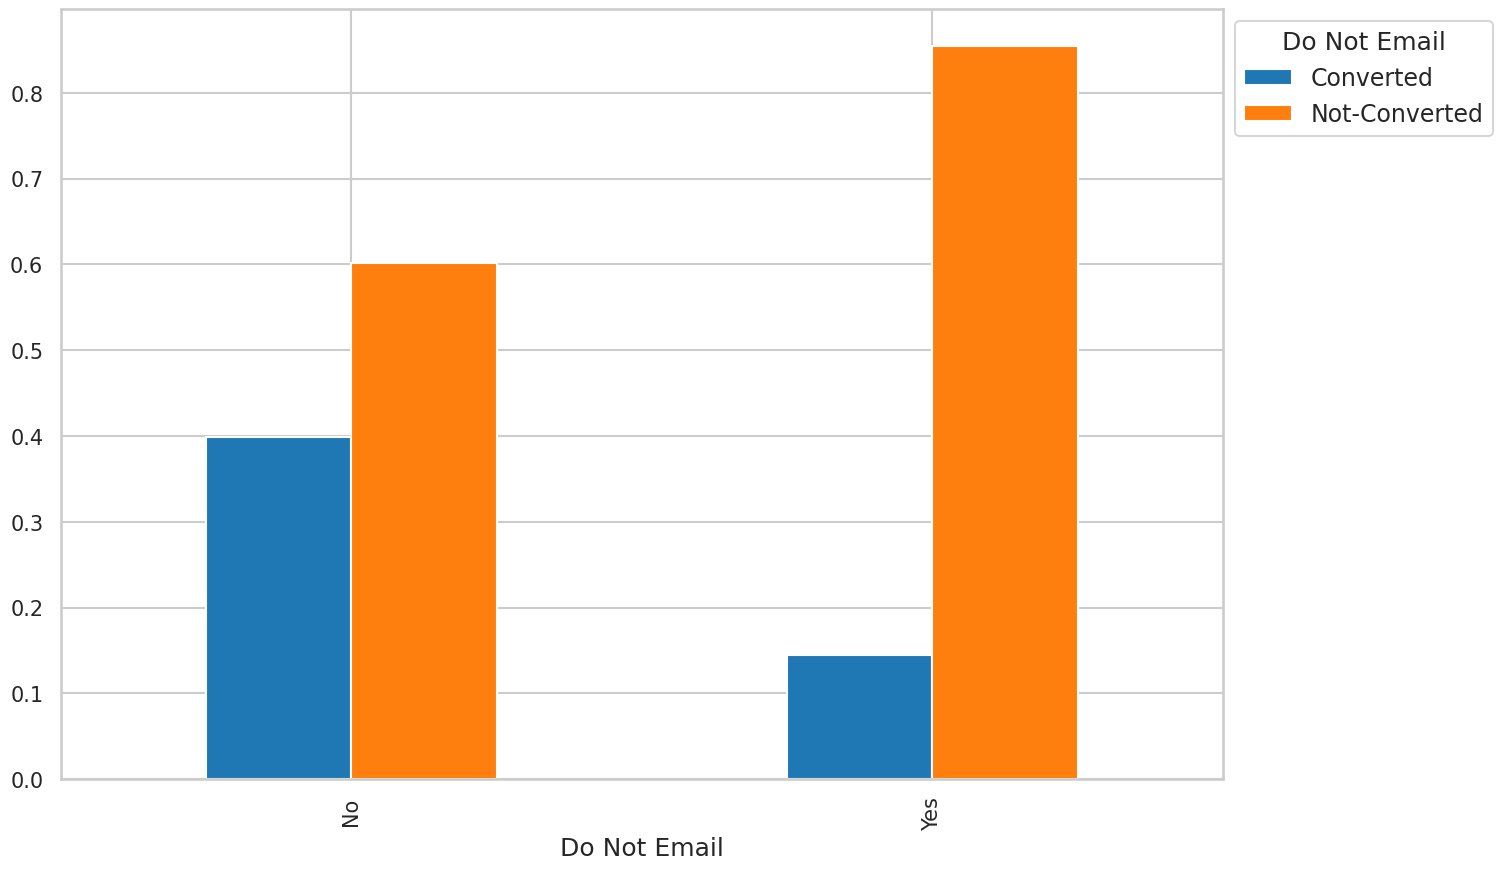

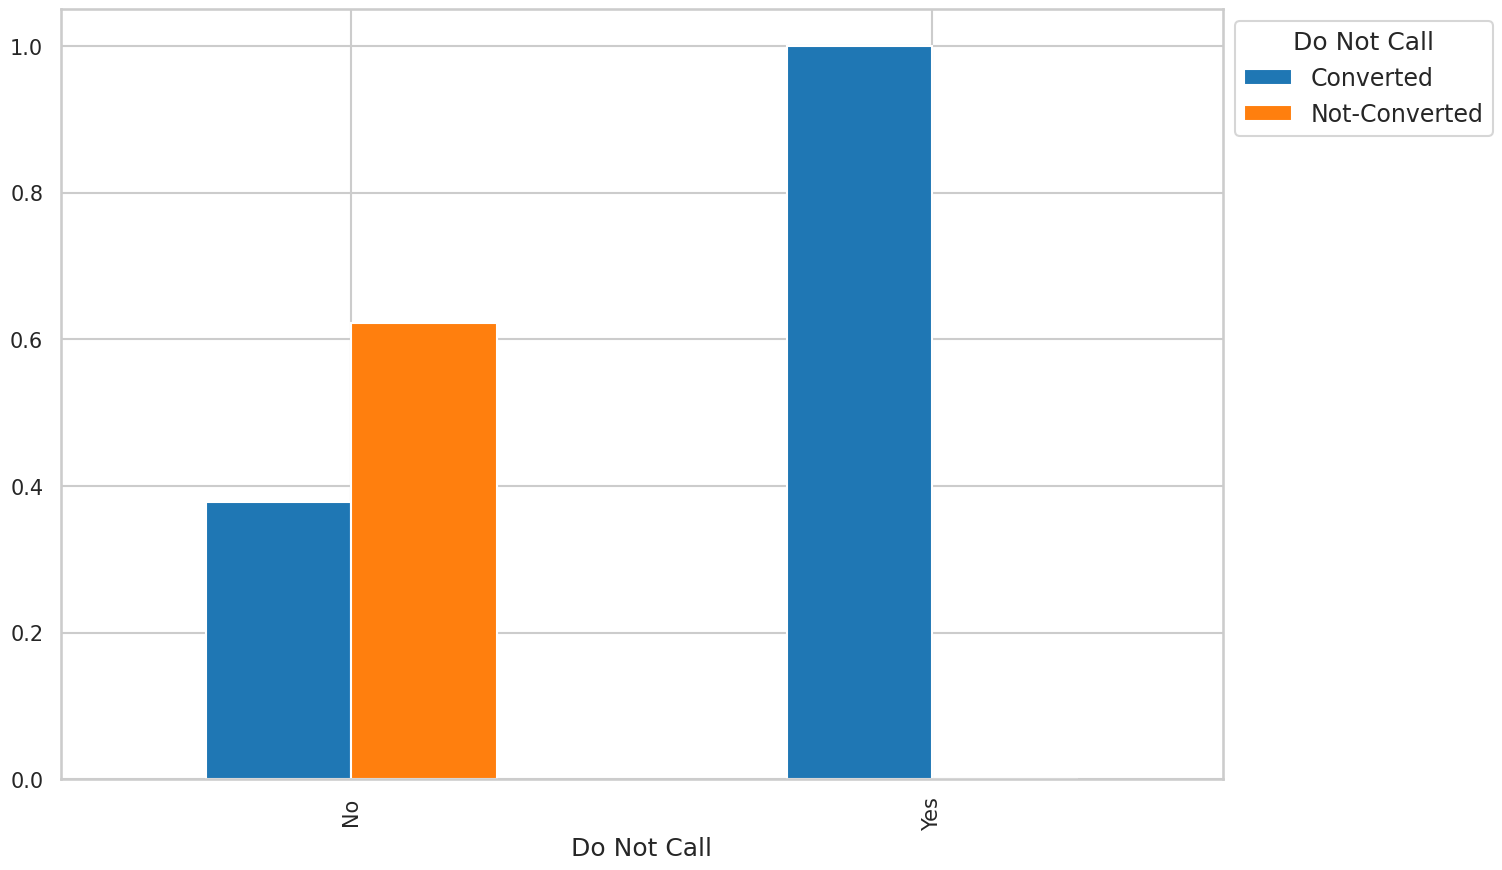

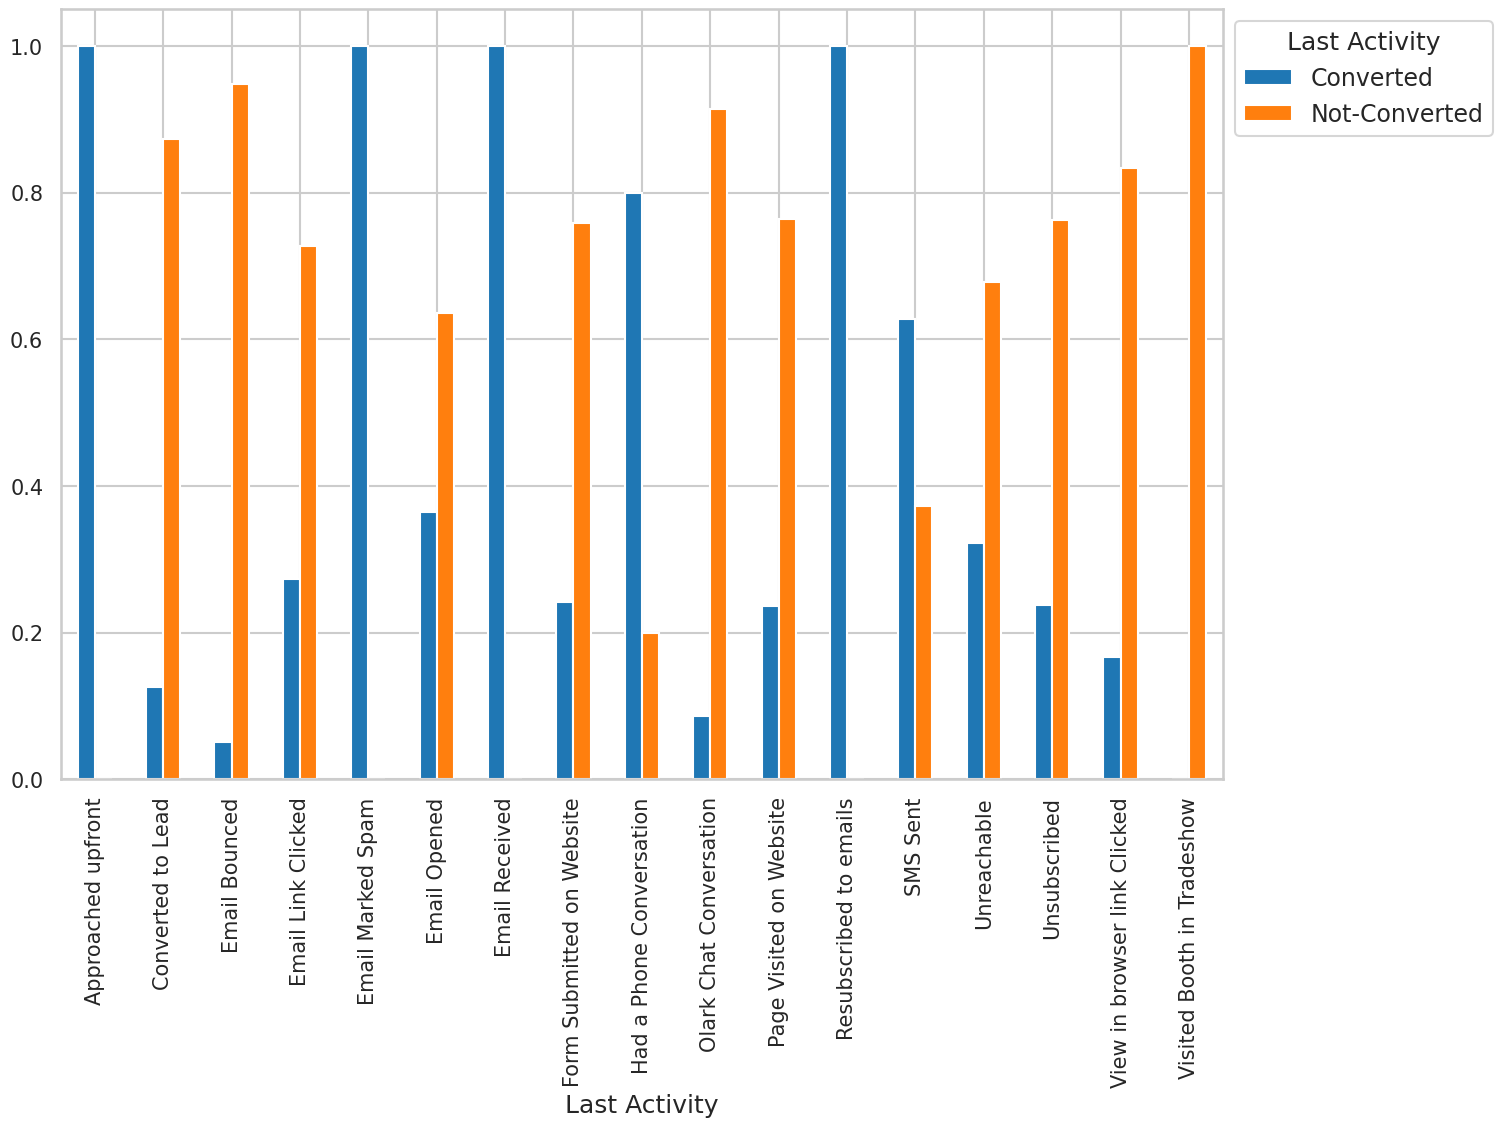

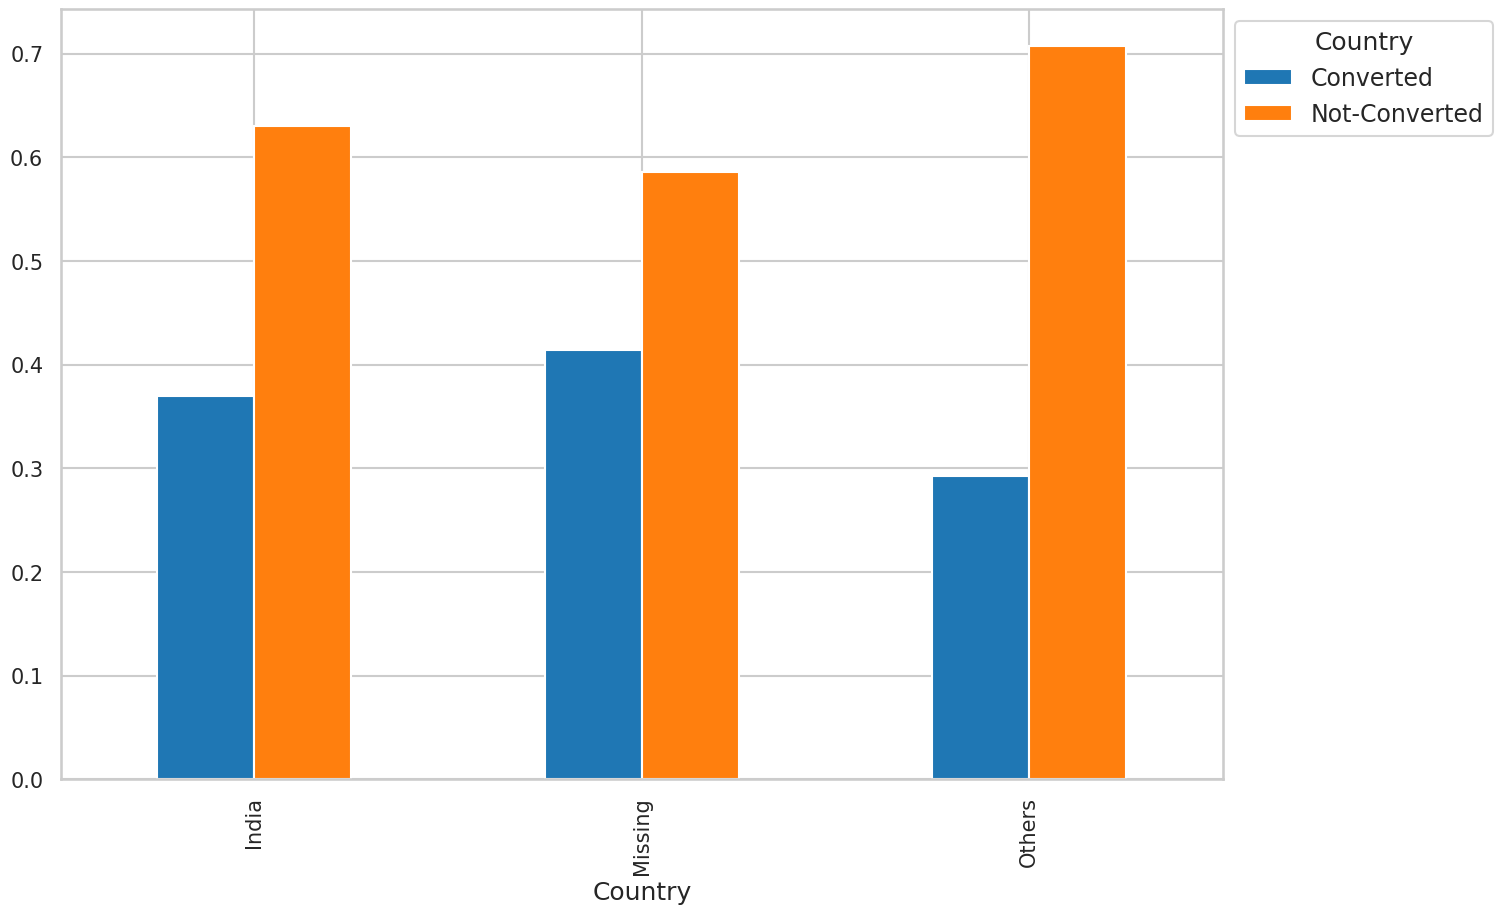

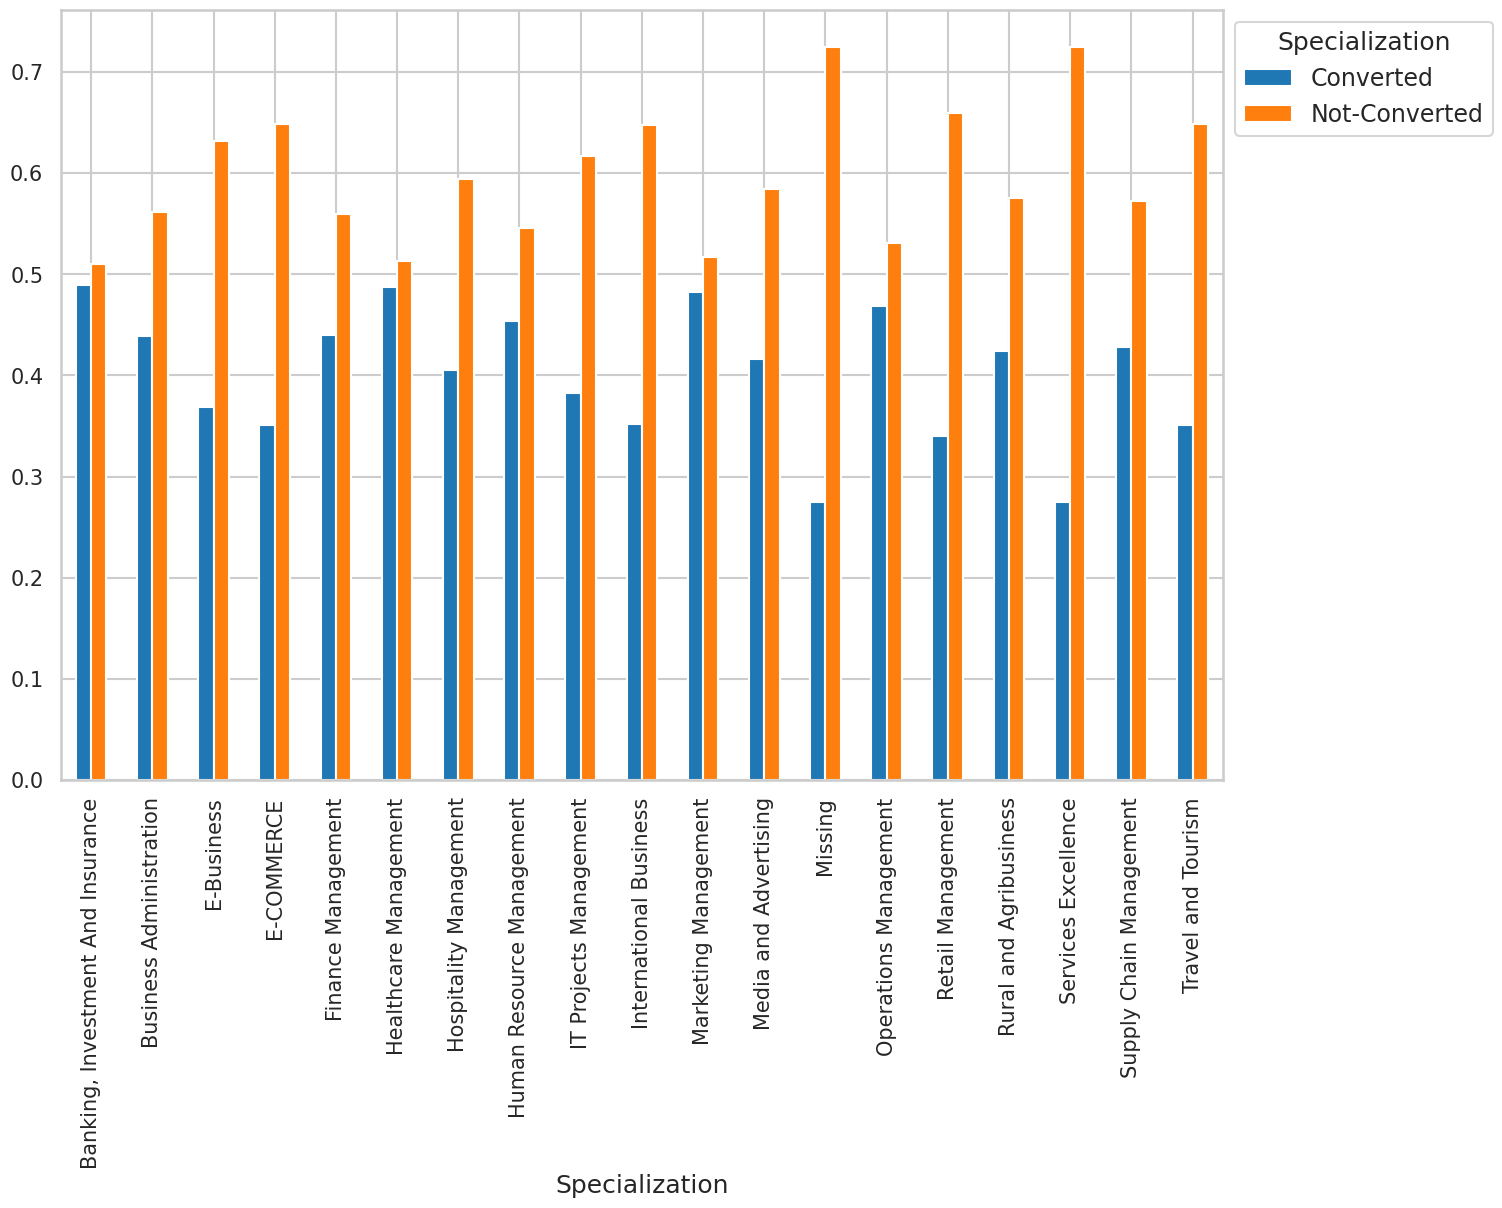

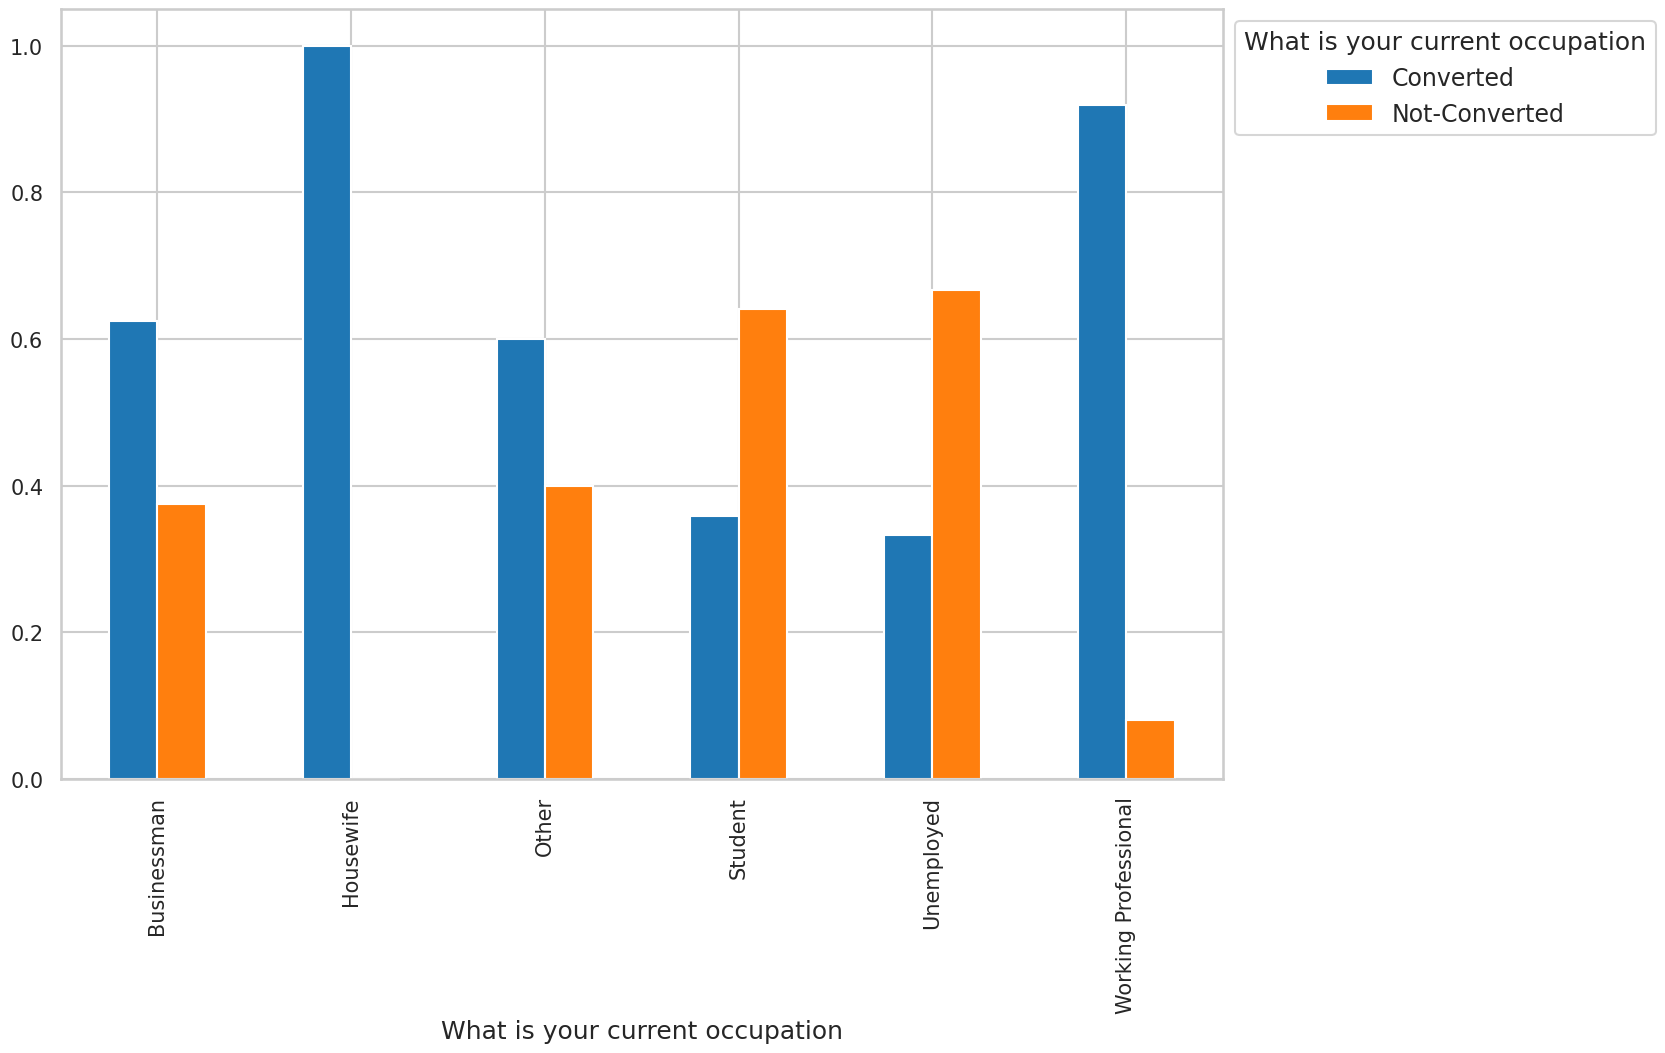

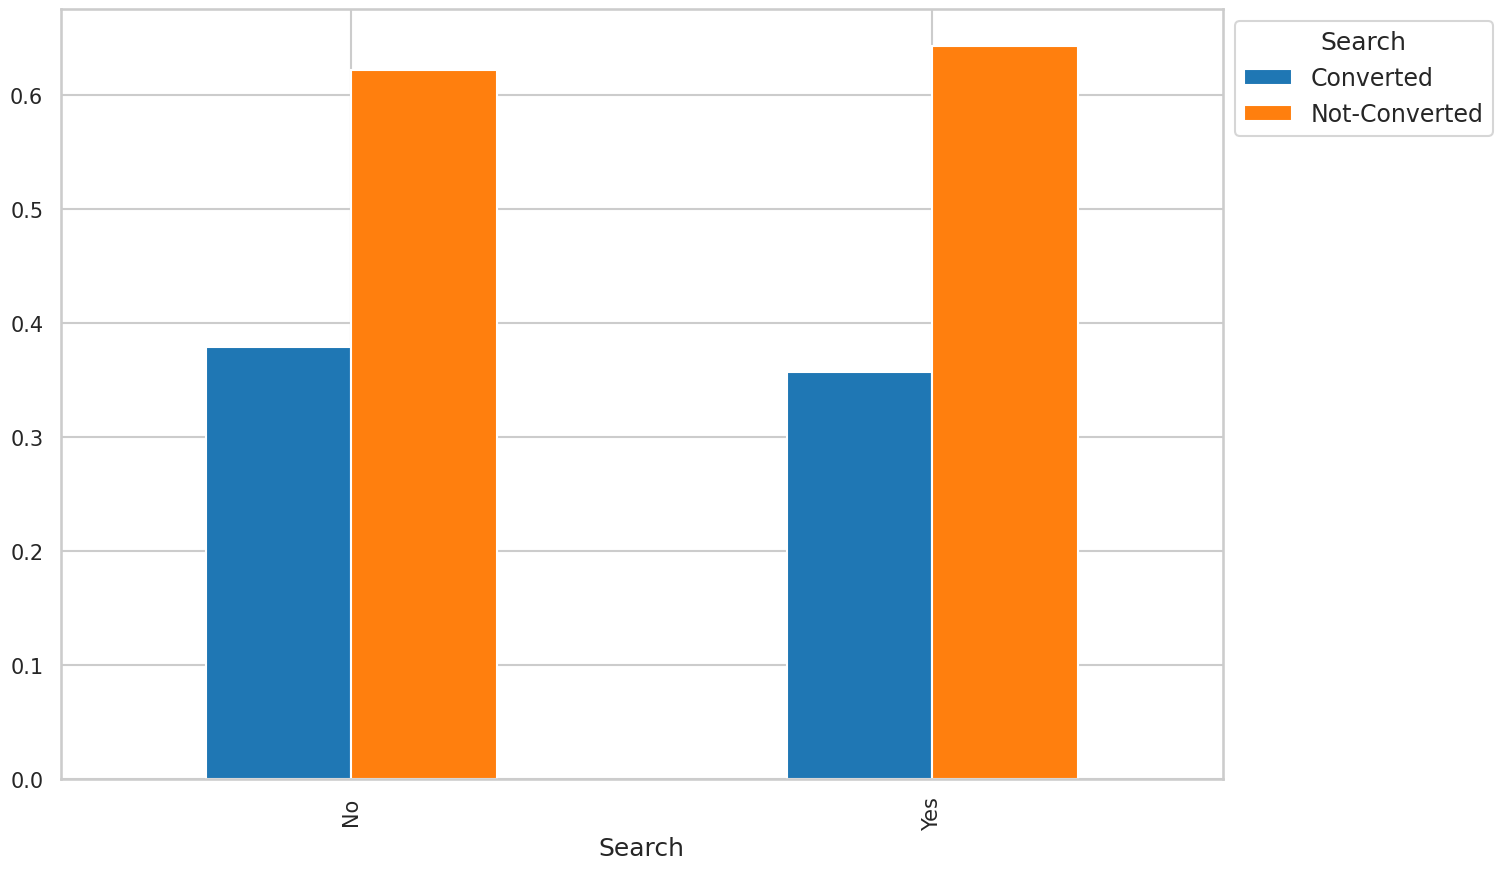

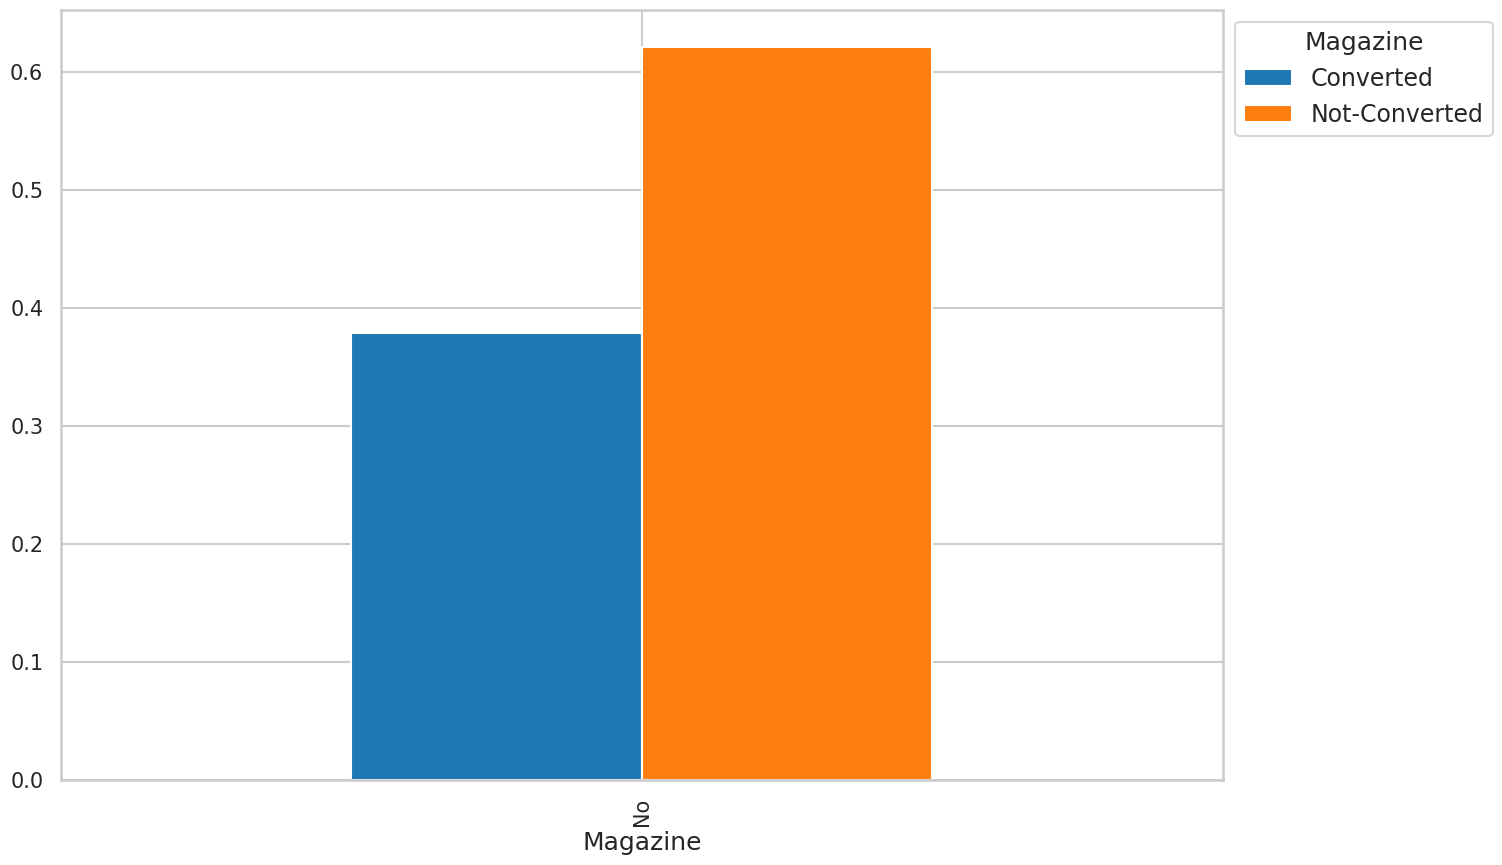

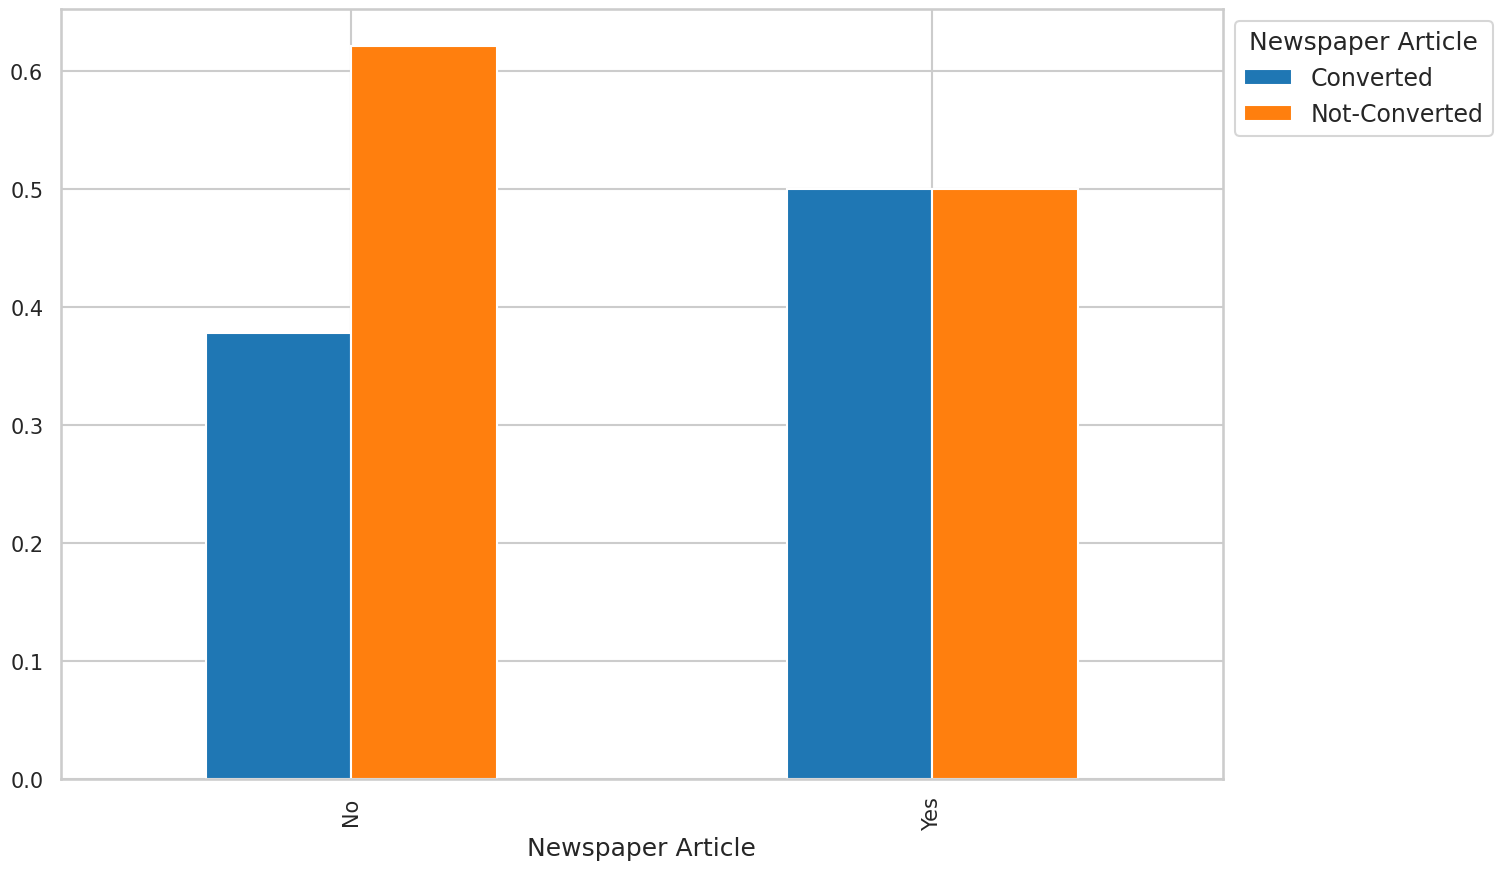

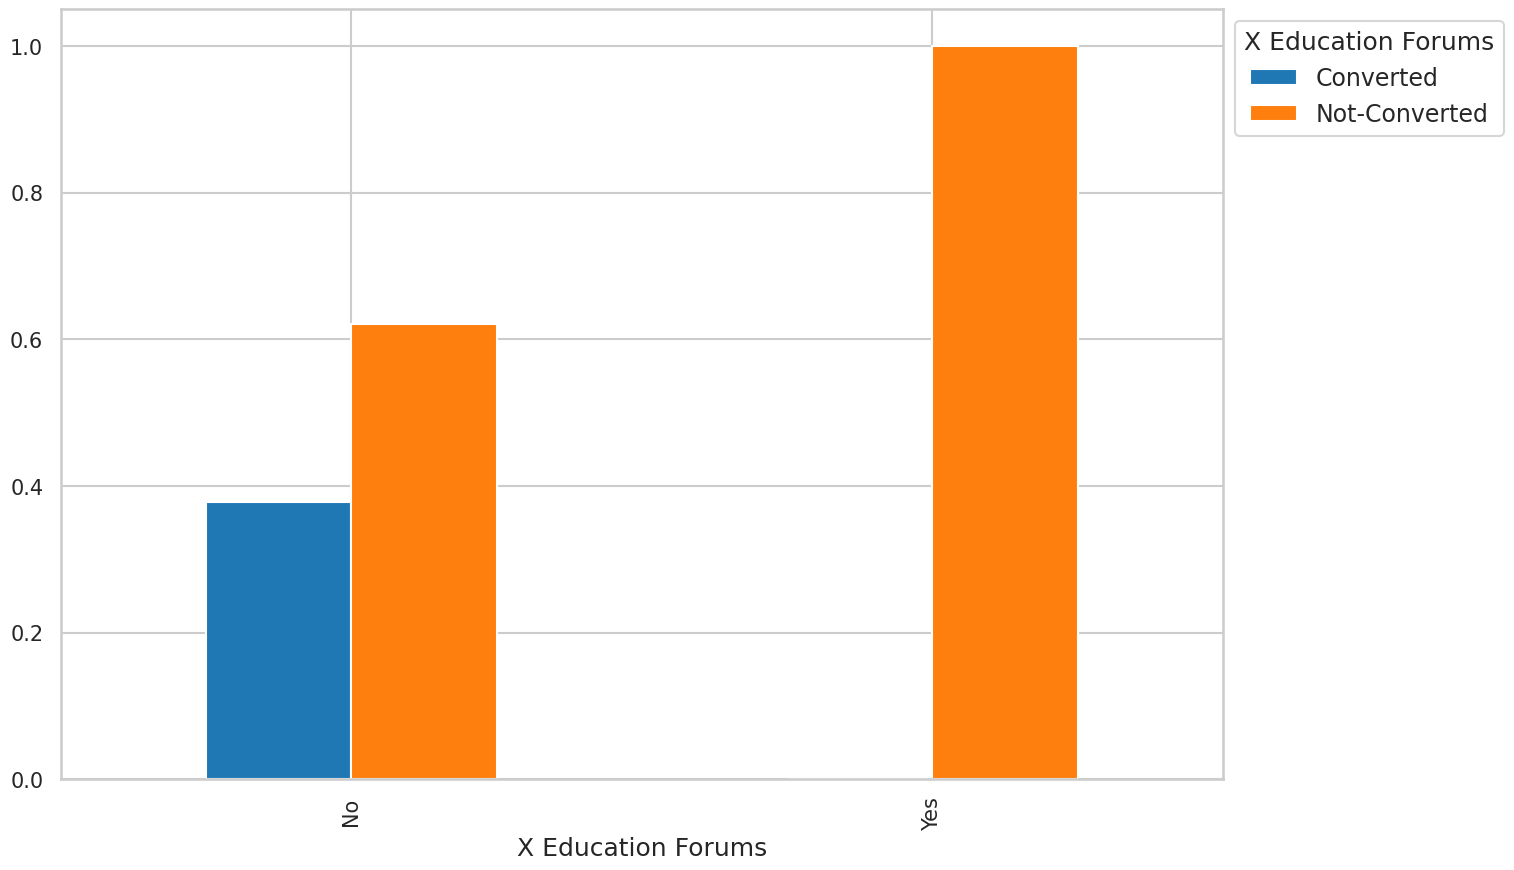

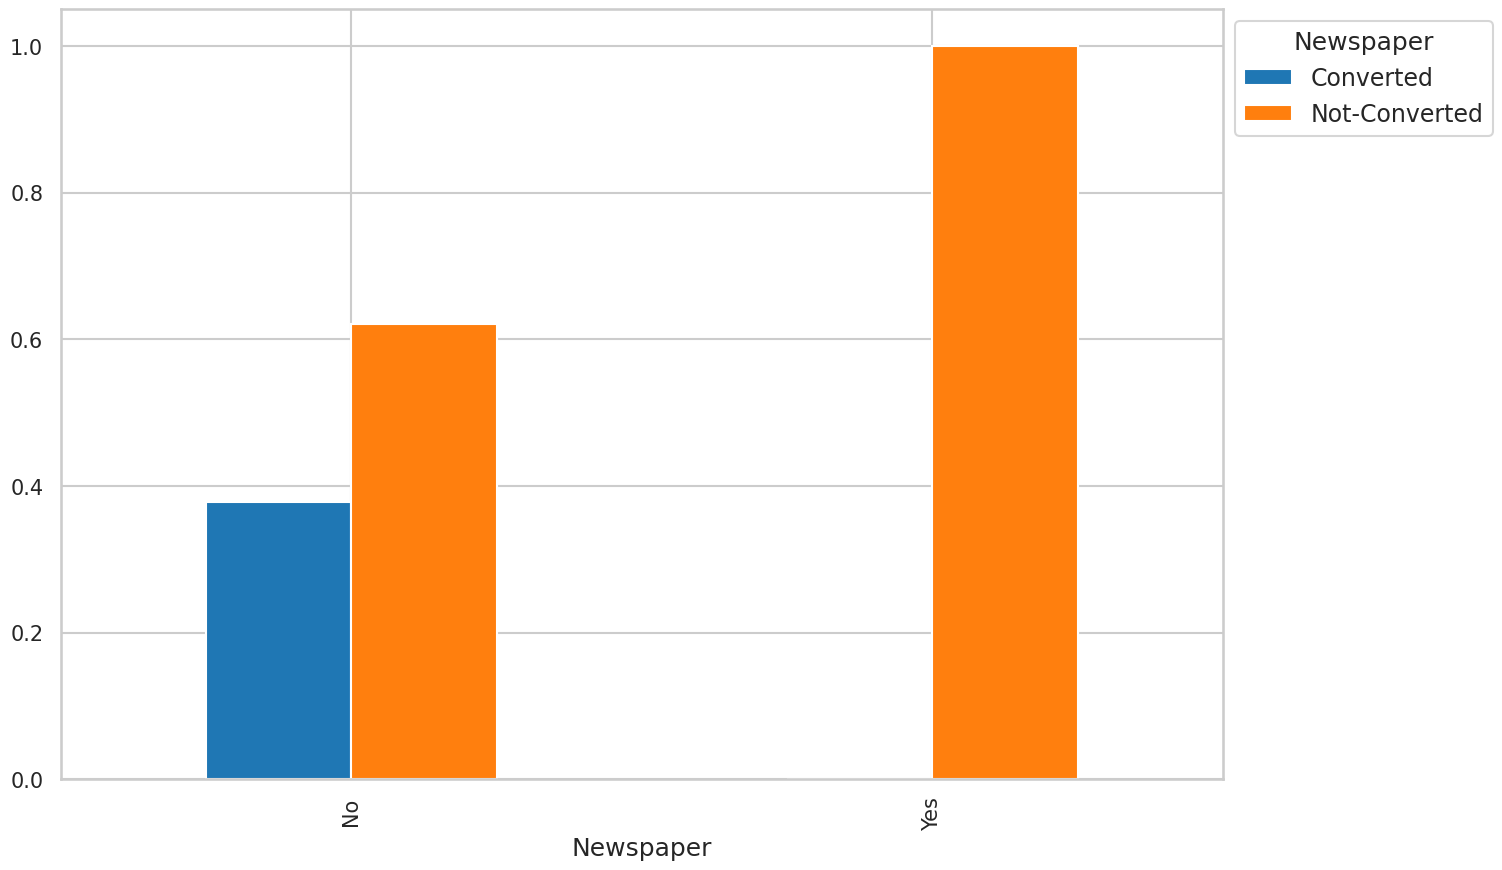

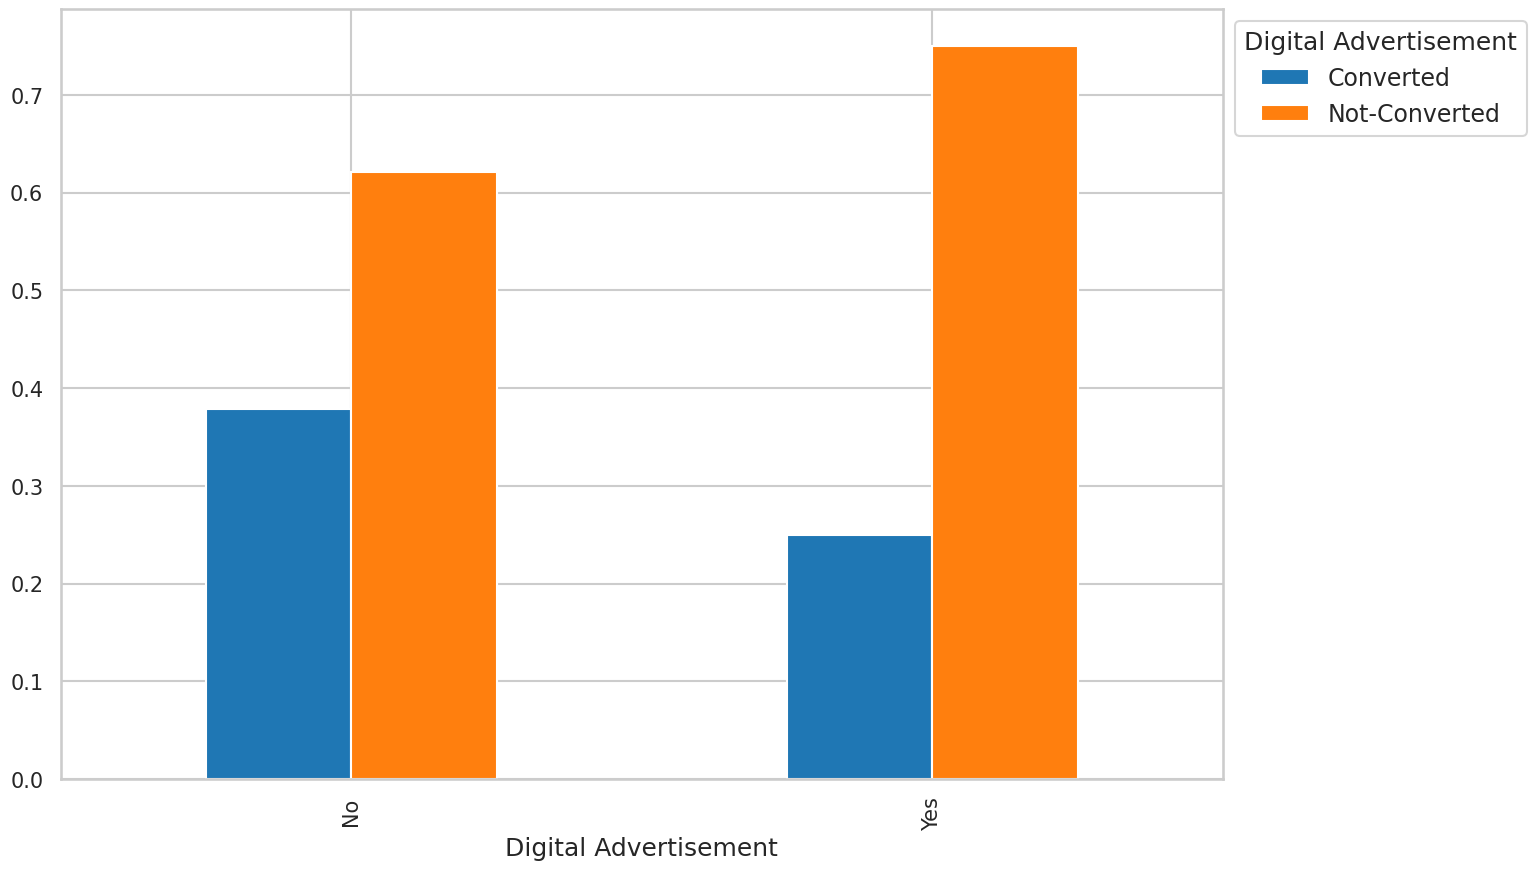

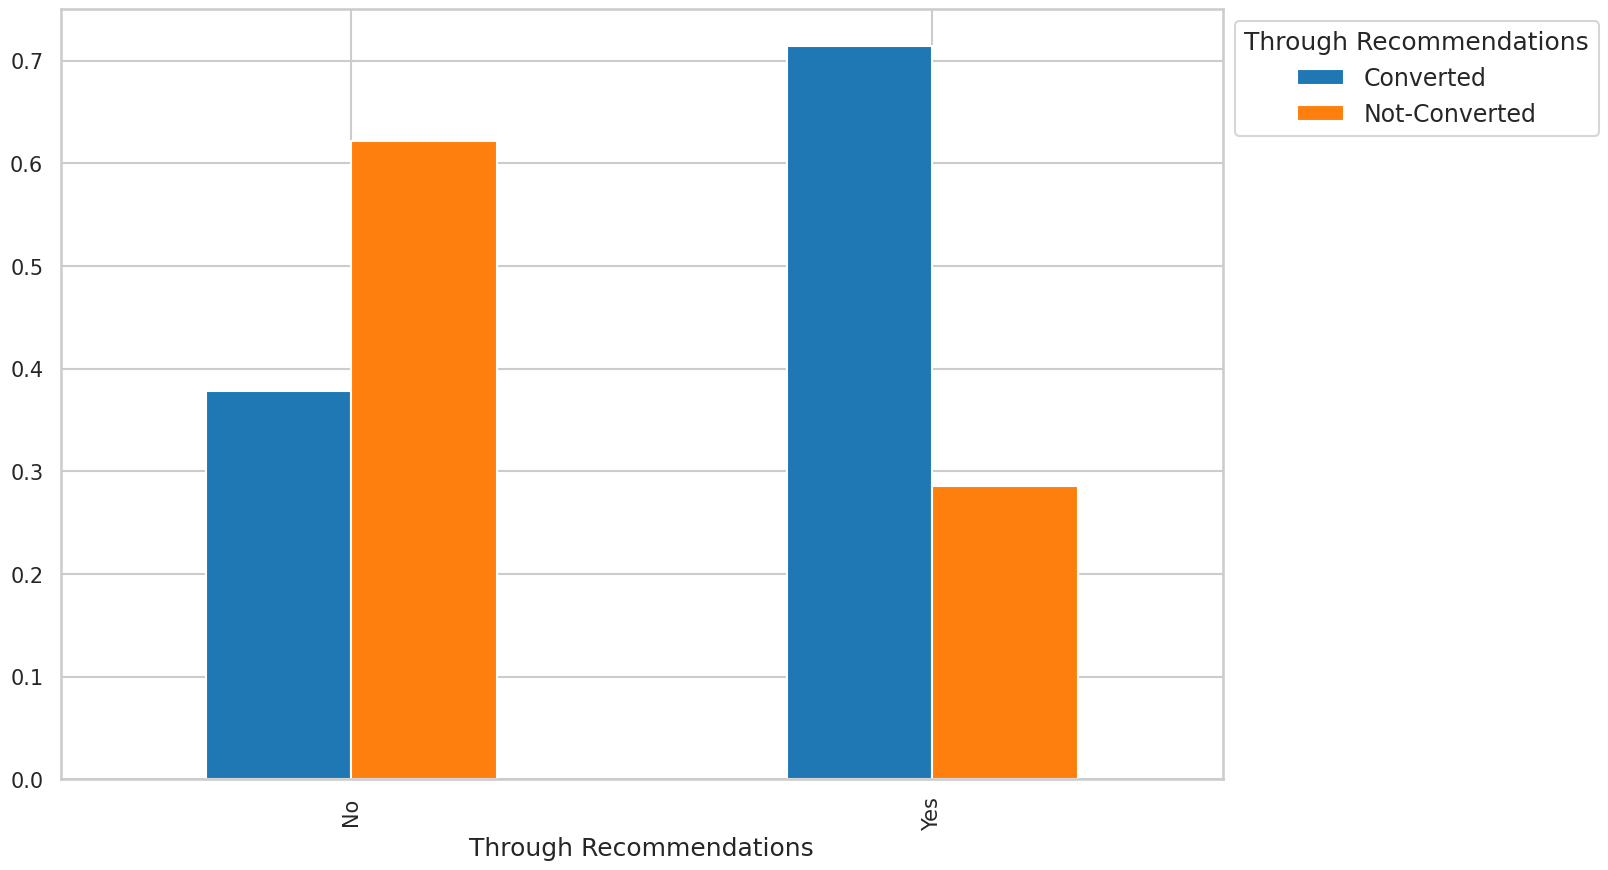

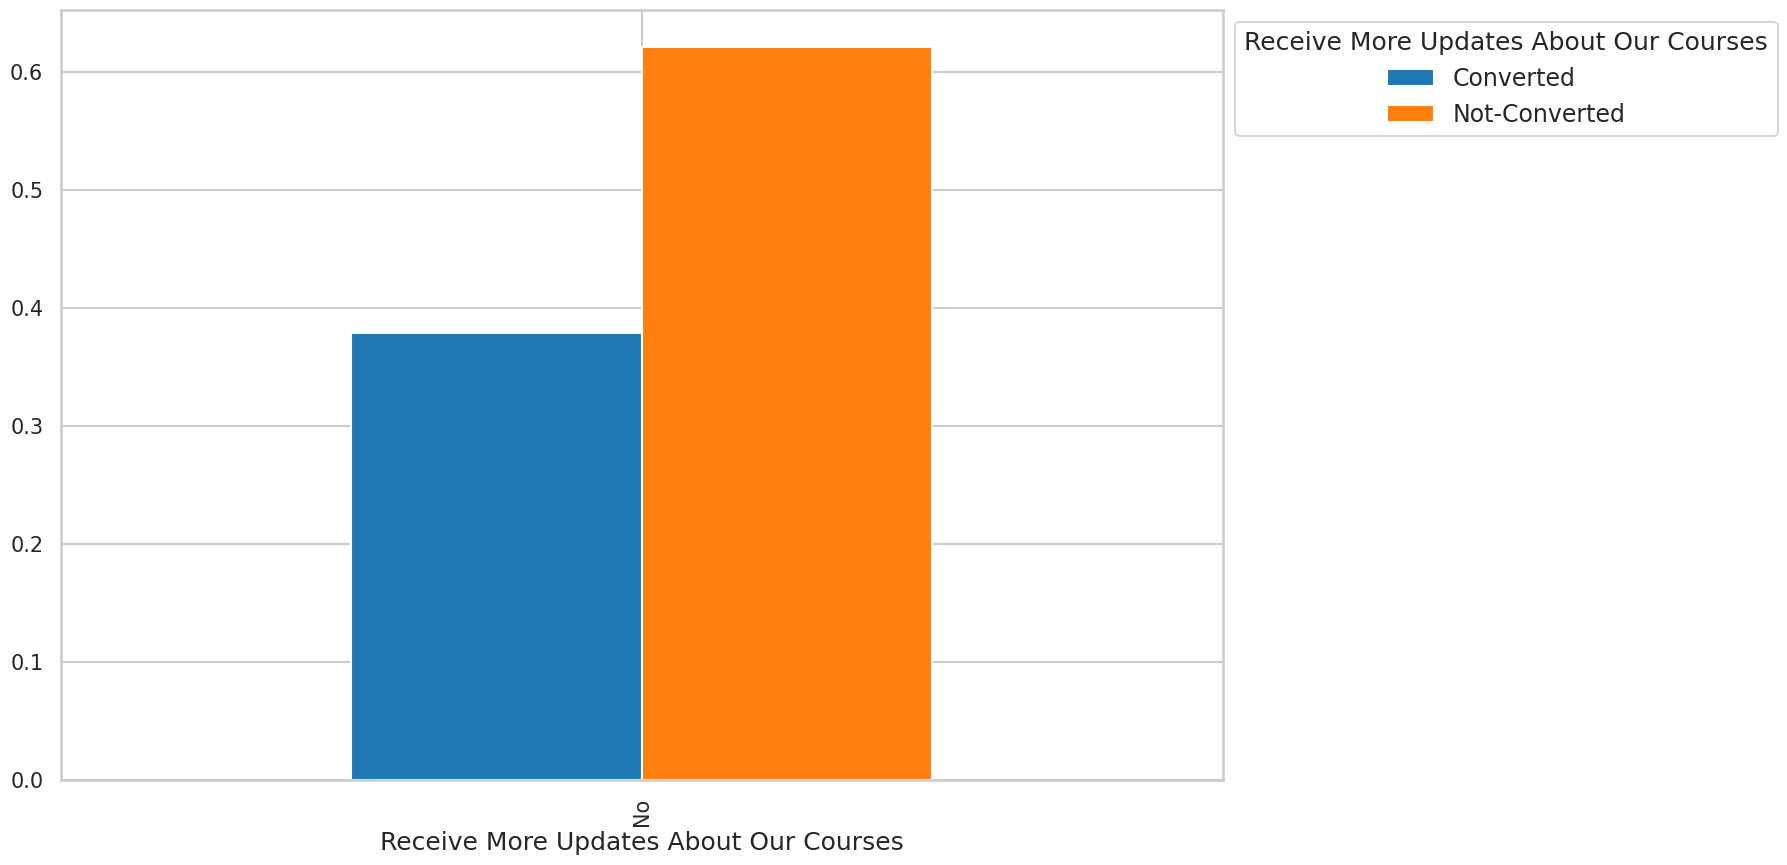

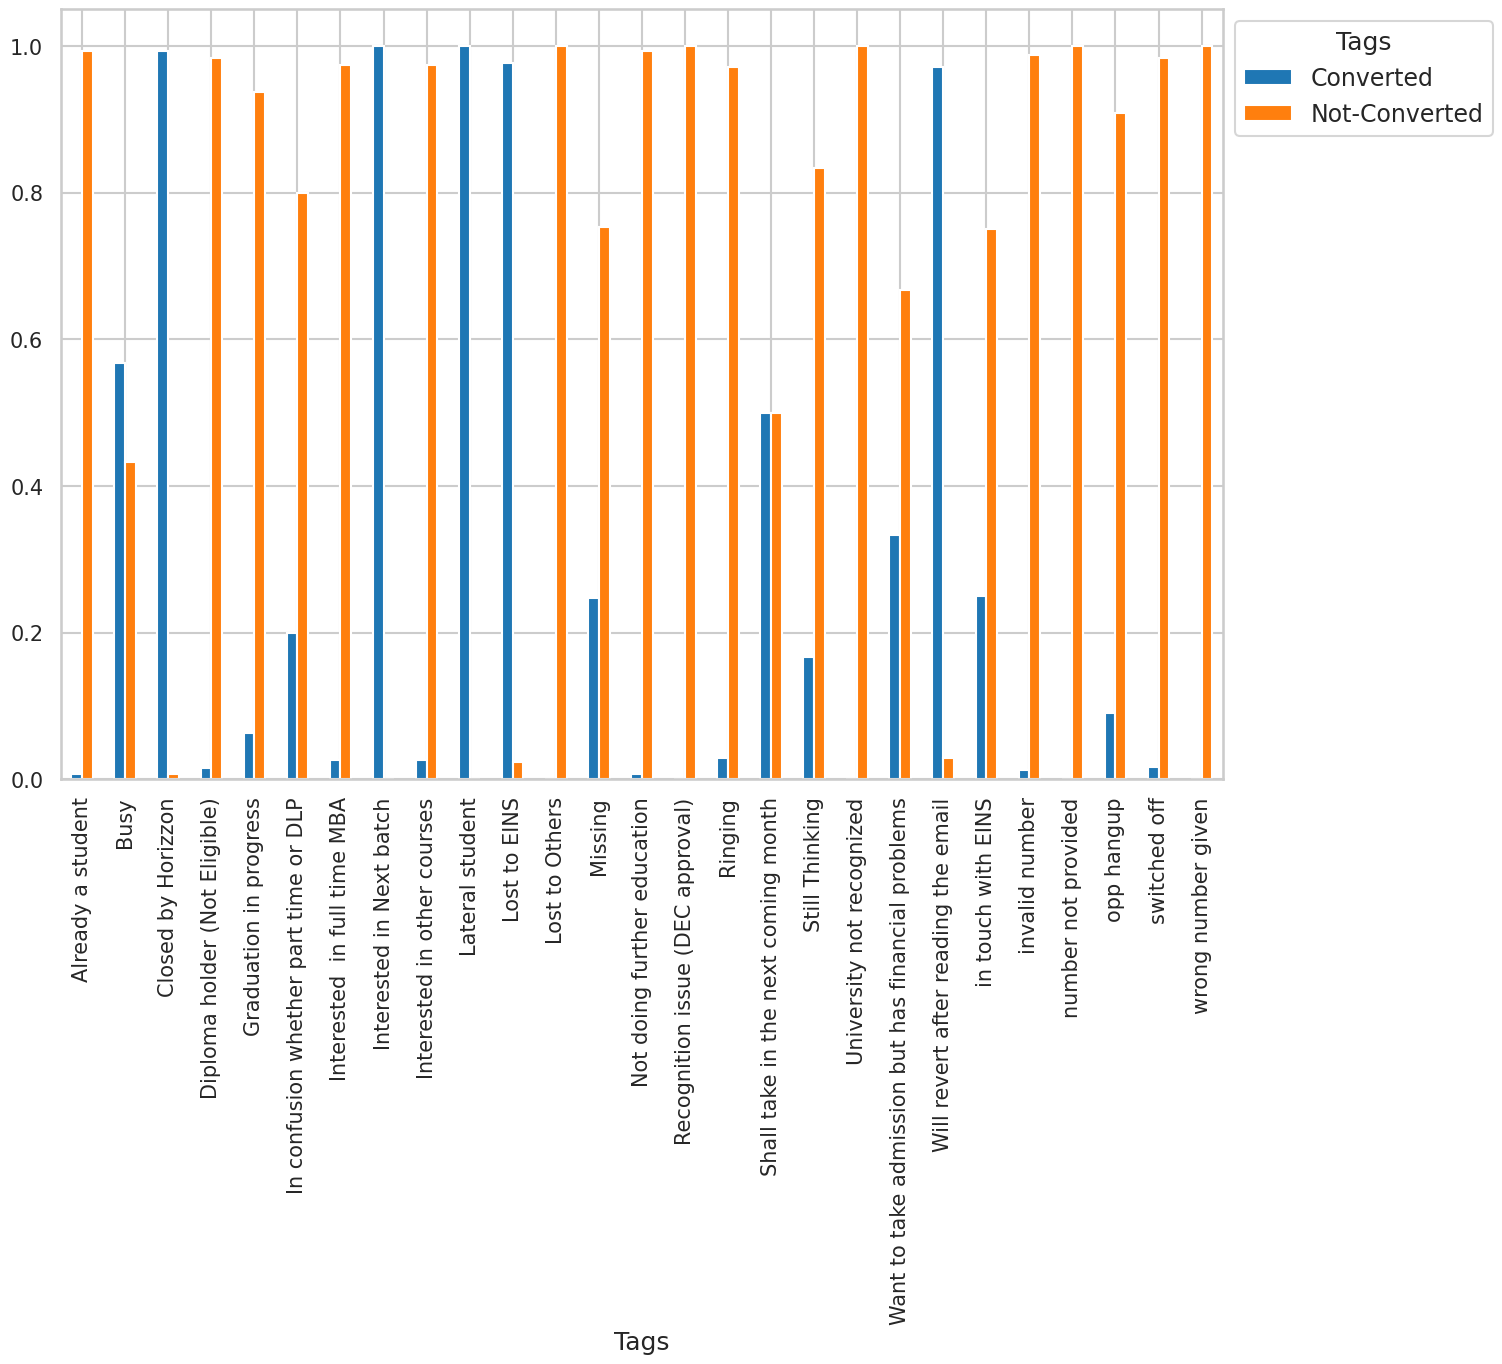

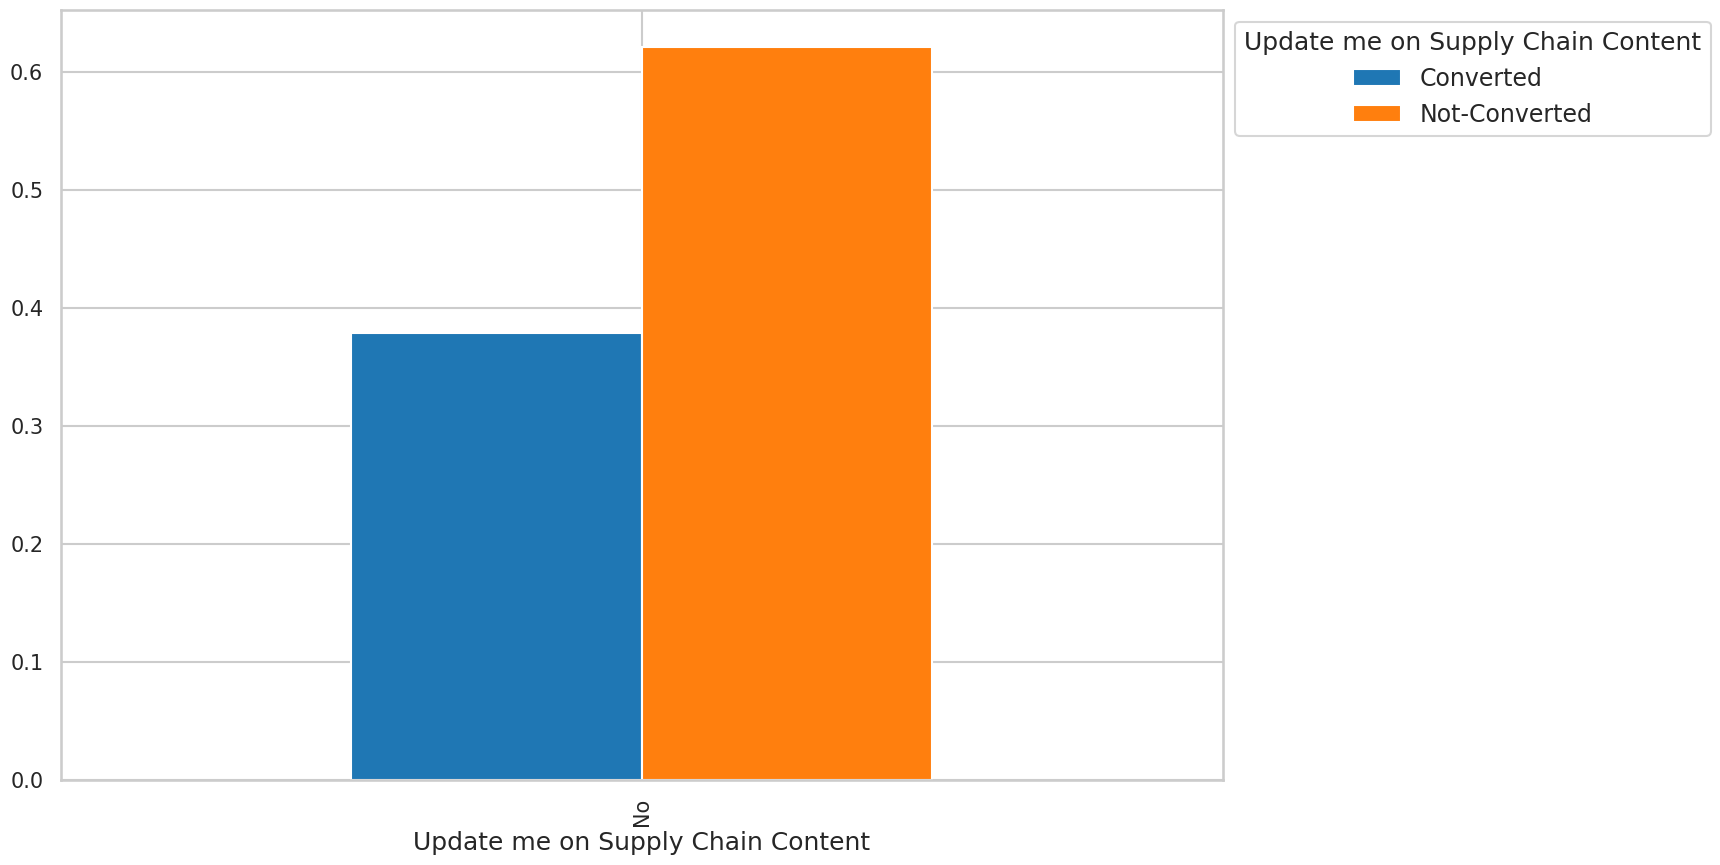

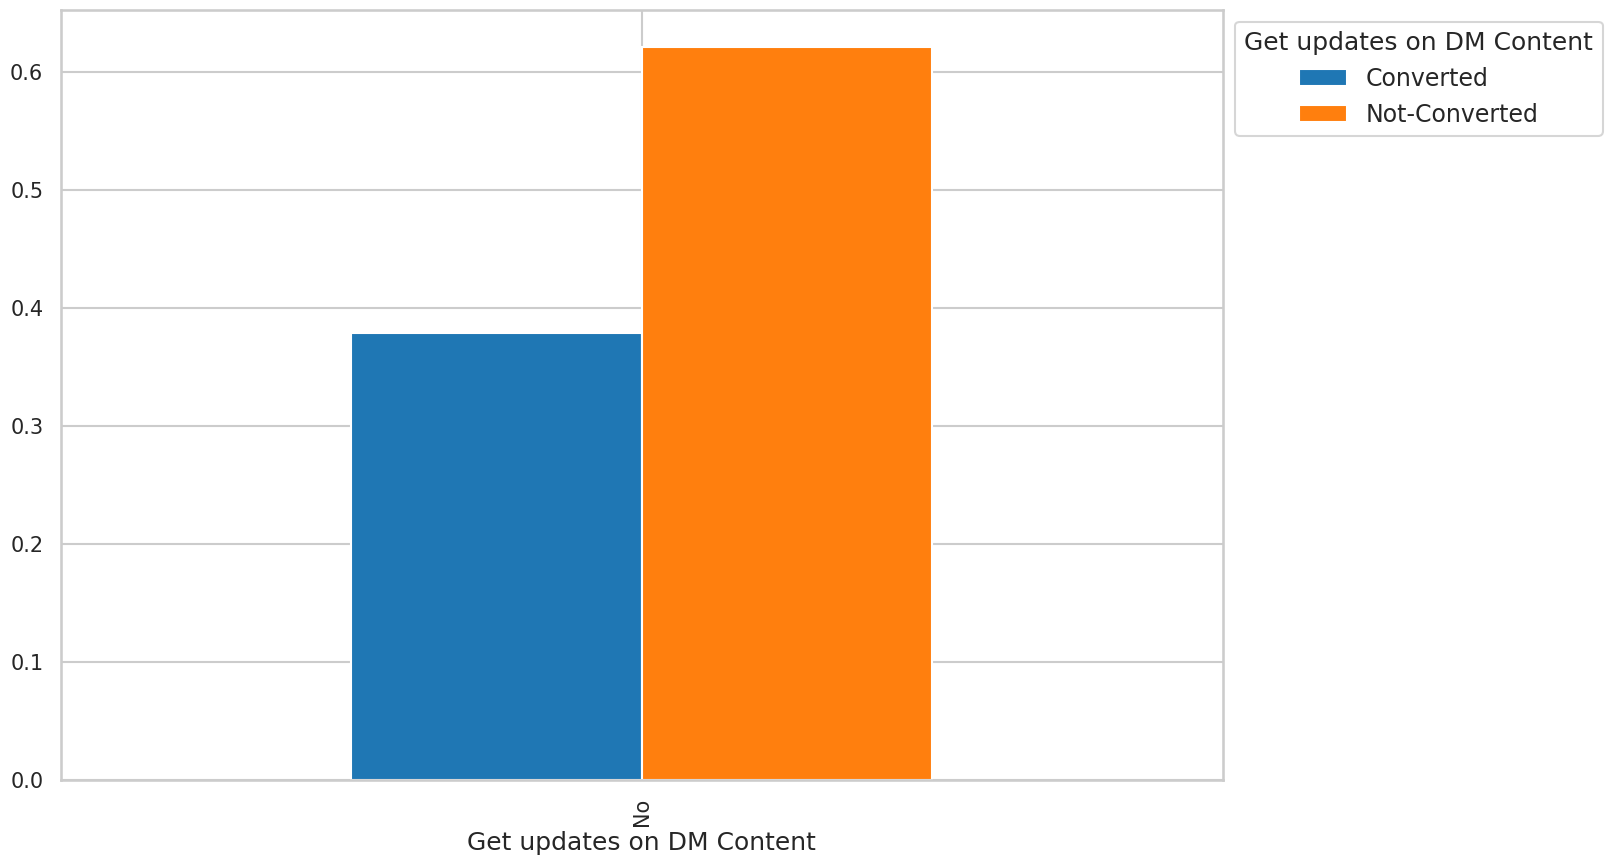

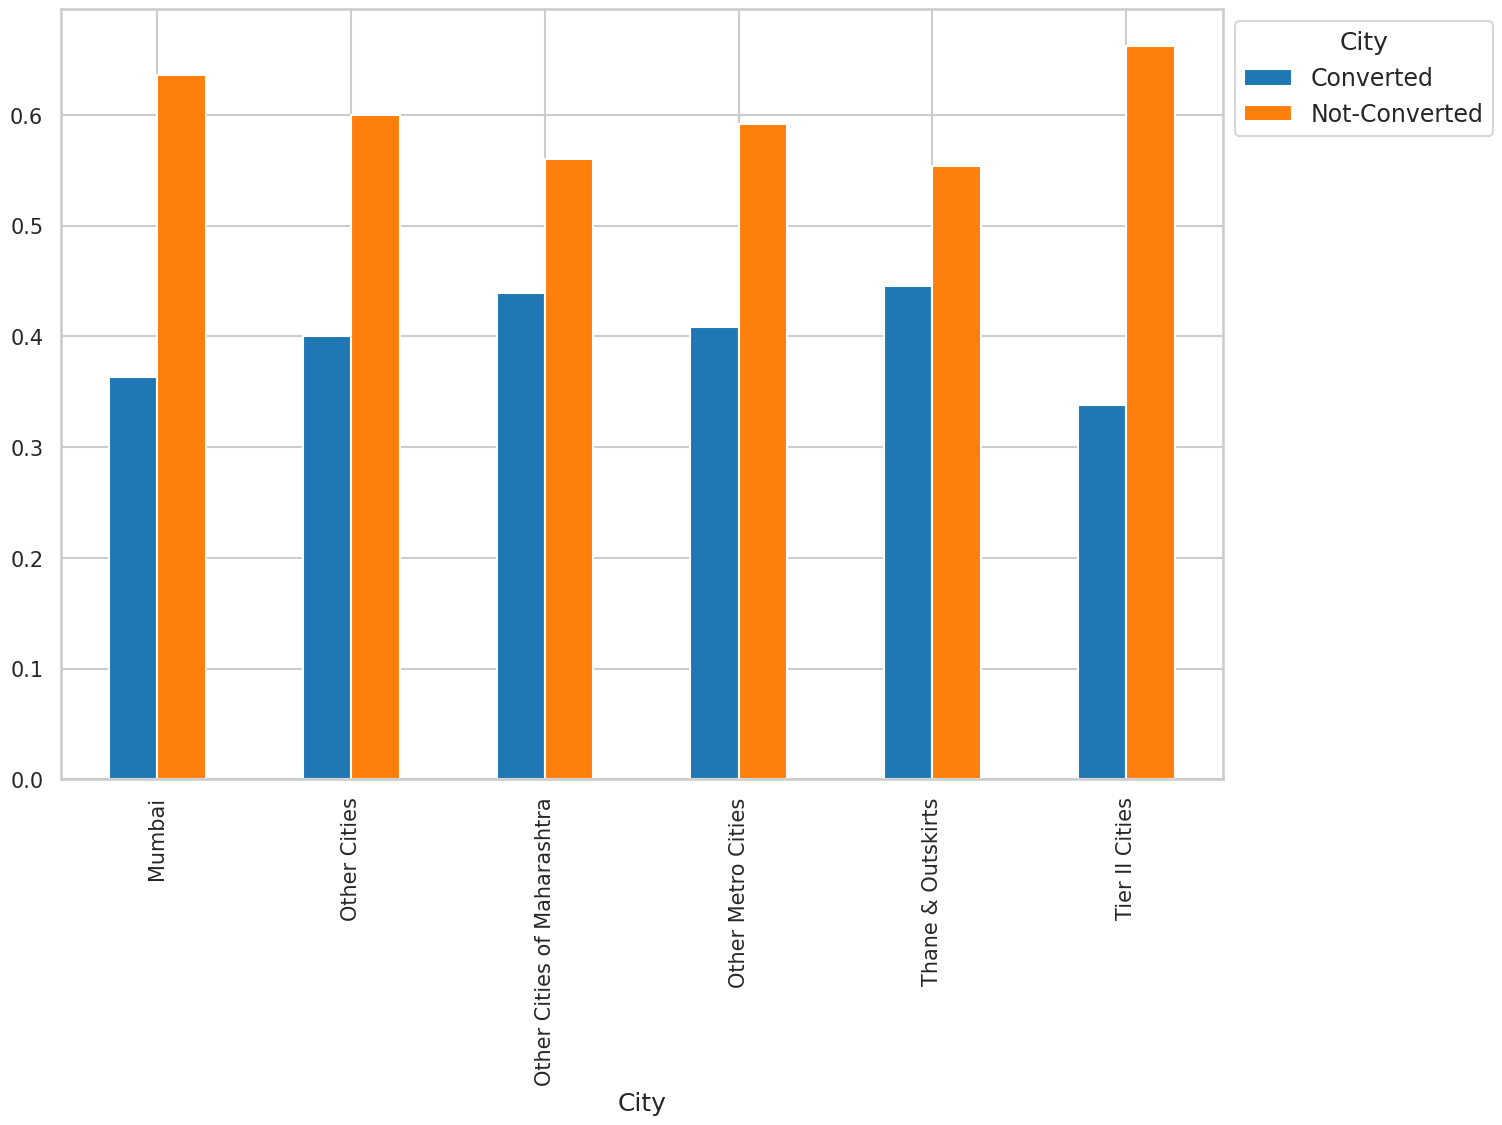

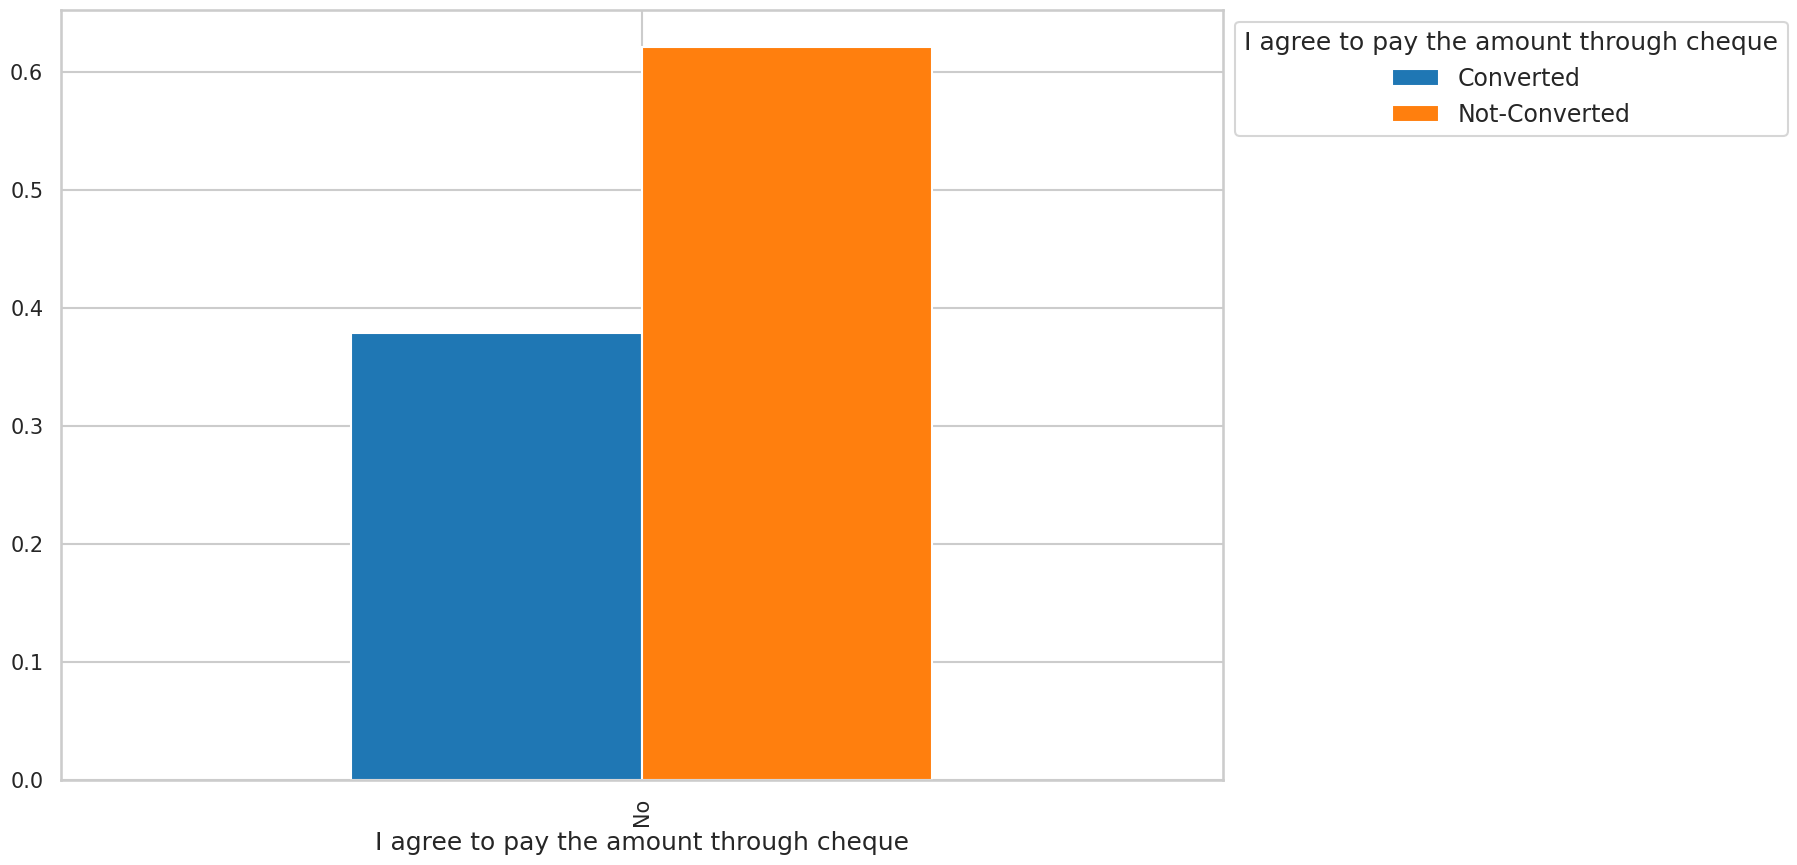

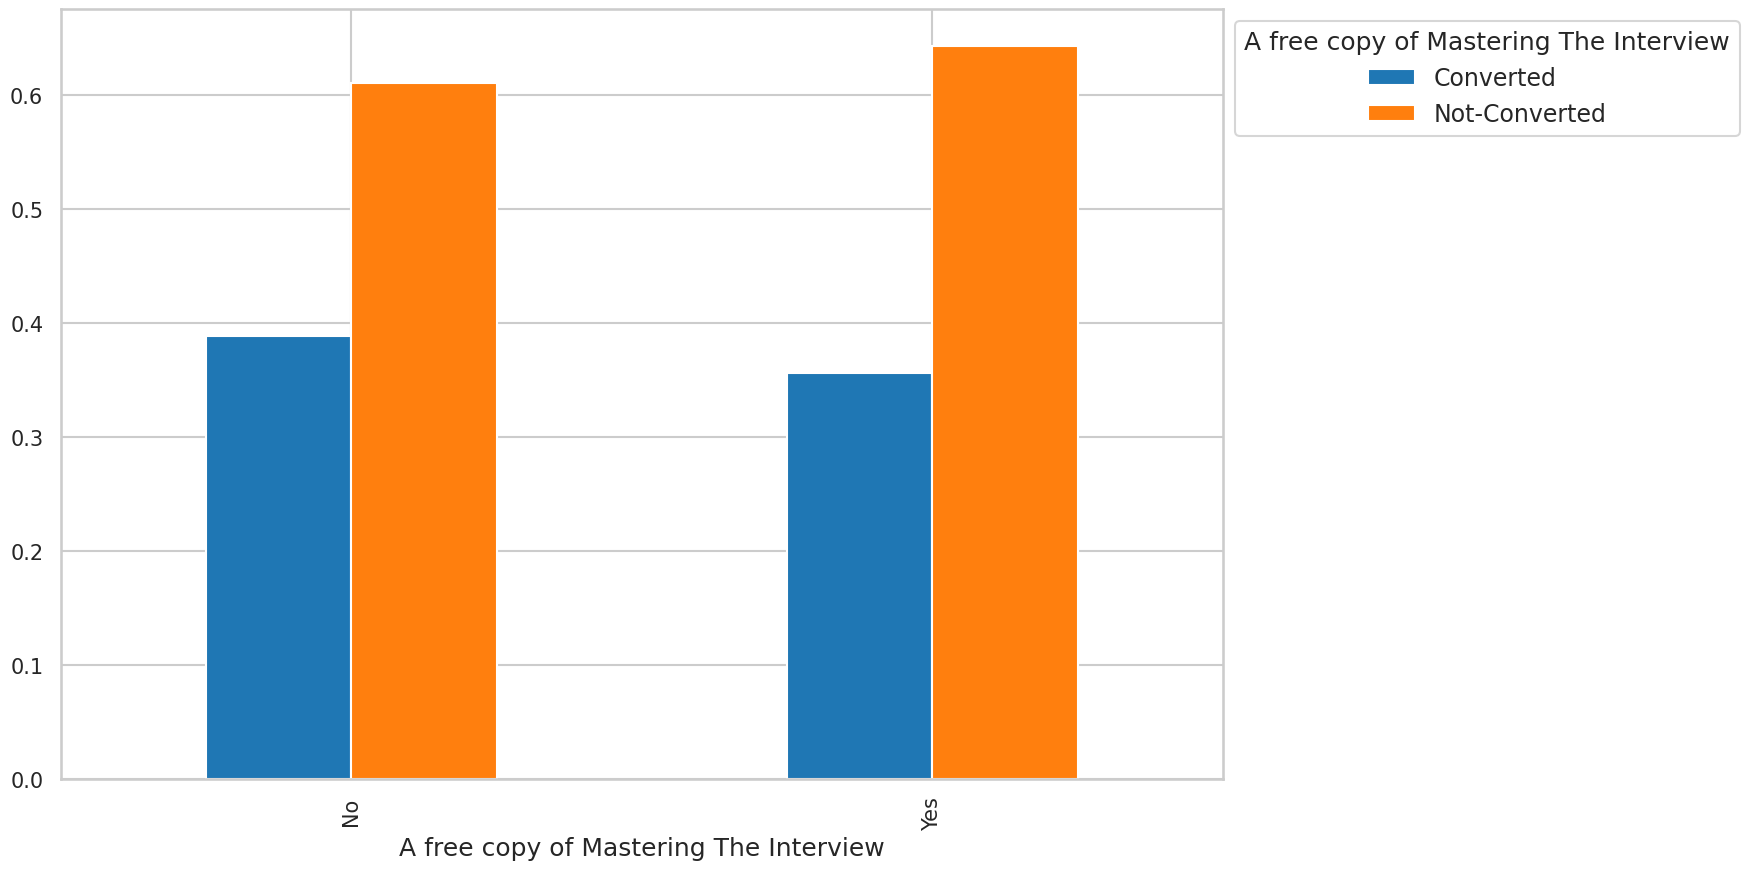

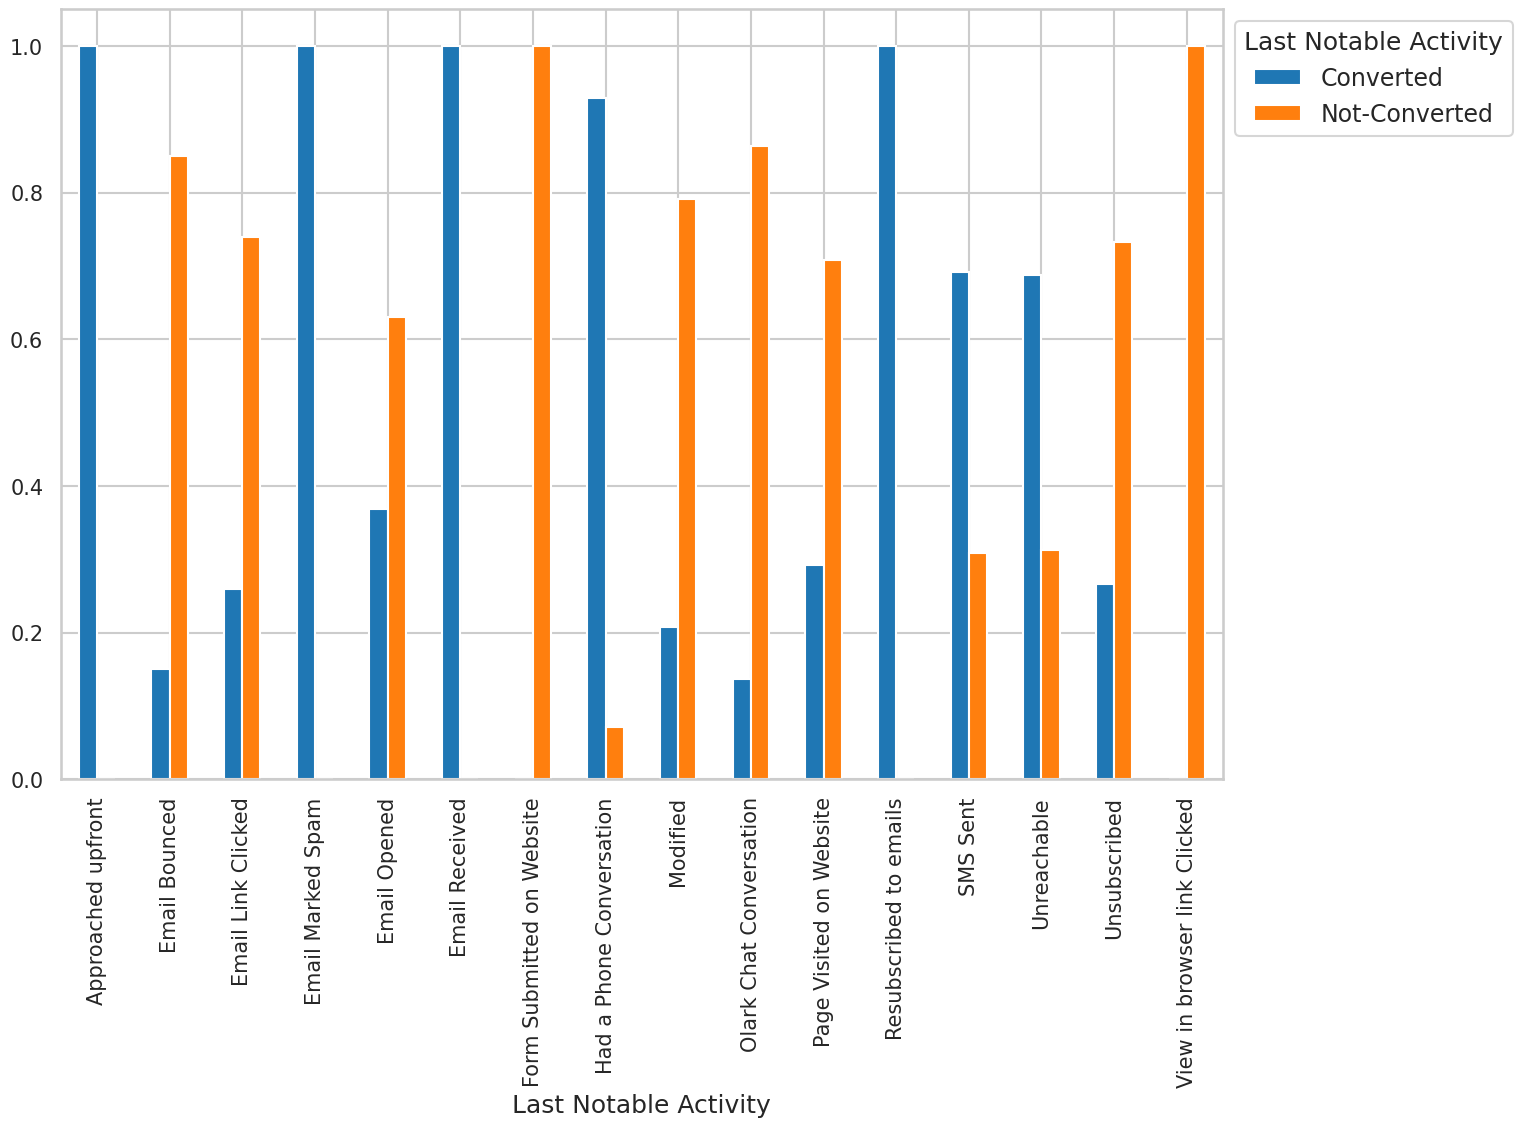

In [30]:
# Let check the conversion ration of categorical variables

category_vars = ['Lead Origin','Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
for idx, item in enumerate(category_vars):
    category_wise = leads.groupby(item)["Converted"].value_counts(normalize=True)
    category_wise.rename(index={0: 'Not-Converted'}, inplace=True)
    category_wise.rename(index={1: 'Converted'}, inplace=True)
    category_wise.unstack(level='Converted').plot(kind='bar', figsize=(15,10), fontsize=15)
    plt.legend(title=item, bbox_to_anchor=(1, 1), loc='upper left', fontsize = 17)

# We see that lead from Add forms has much higher conversion rate when compared to leads from other origin
# Customers who have not opted for Do not Email have better conversion rate
# Some lead sources like Live Chat, NC_EDM, Reference, WeLearn and Welingak website has good conversion rate
# where as sources lke Pay per Click Ads, Press_Release, bing, blog, google, testone, weleanblog_Home, youtubechannel has poor conversion rate
# Customers who have opted for Do not call have 100% conversion rate
# Last activity like Approached upfront, Email Marked Spam, Email Received and Subscribed to emails have good conversion rate
# Last activity like Email bounced, Olark chat conversation and visited booth in trade show have poor conversion rate
# Country has no significant impact on conversion rate
# Occupation like Housewife, working professional has higher conversion rates
# Customers who has opted for X Education forums and Newspapaer are likely to be not converted
# Customers Through Recommendations are more likely to be converted

# Categorical variables to Numerical

In [31]:
# Convert some important categorial variables to numerical

leads['Do Not Email'] = leads['Do Not Email'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Do Not Call'] = leads['Do Not Call'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Search'] = leads['Search'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Magazine'] = leads['Magazine'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Newspaper Article'] = leads['Newspaper Article'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['X Education Forums'] = leads['X Education Forums'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Newspaper'] = leads['Newspaper'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Digital Advertisement'] = leads['Digital Advertisement'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Through Recommendations'] = leads['Through Recommendations'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Receive More Updates About Our Courses'] = leads['Receive More Updates About Our Courses'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Update me on Supply Chain Content'] = leads['Update me on Supply Chain Content'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['Get updates on DM Content'] = leads['Get updates on DM Content'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['I agree to pay the amount through cheque'] = leads['I agree to pay the amount through cheque'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else np.NaN))

# Bivariate Analysis

In [32]:
# We will perfrom bivariate analysis for Defaulter and Non-Defaulter
not_converted = leads[leads.Converted == 0]
converted = leads[leads.Converted == 1]

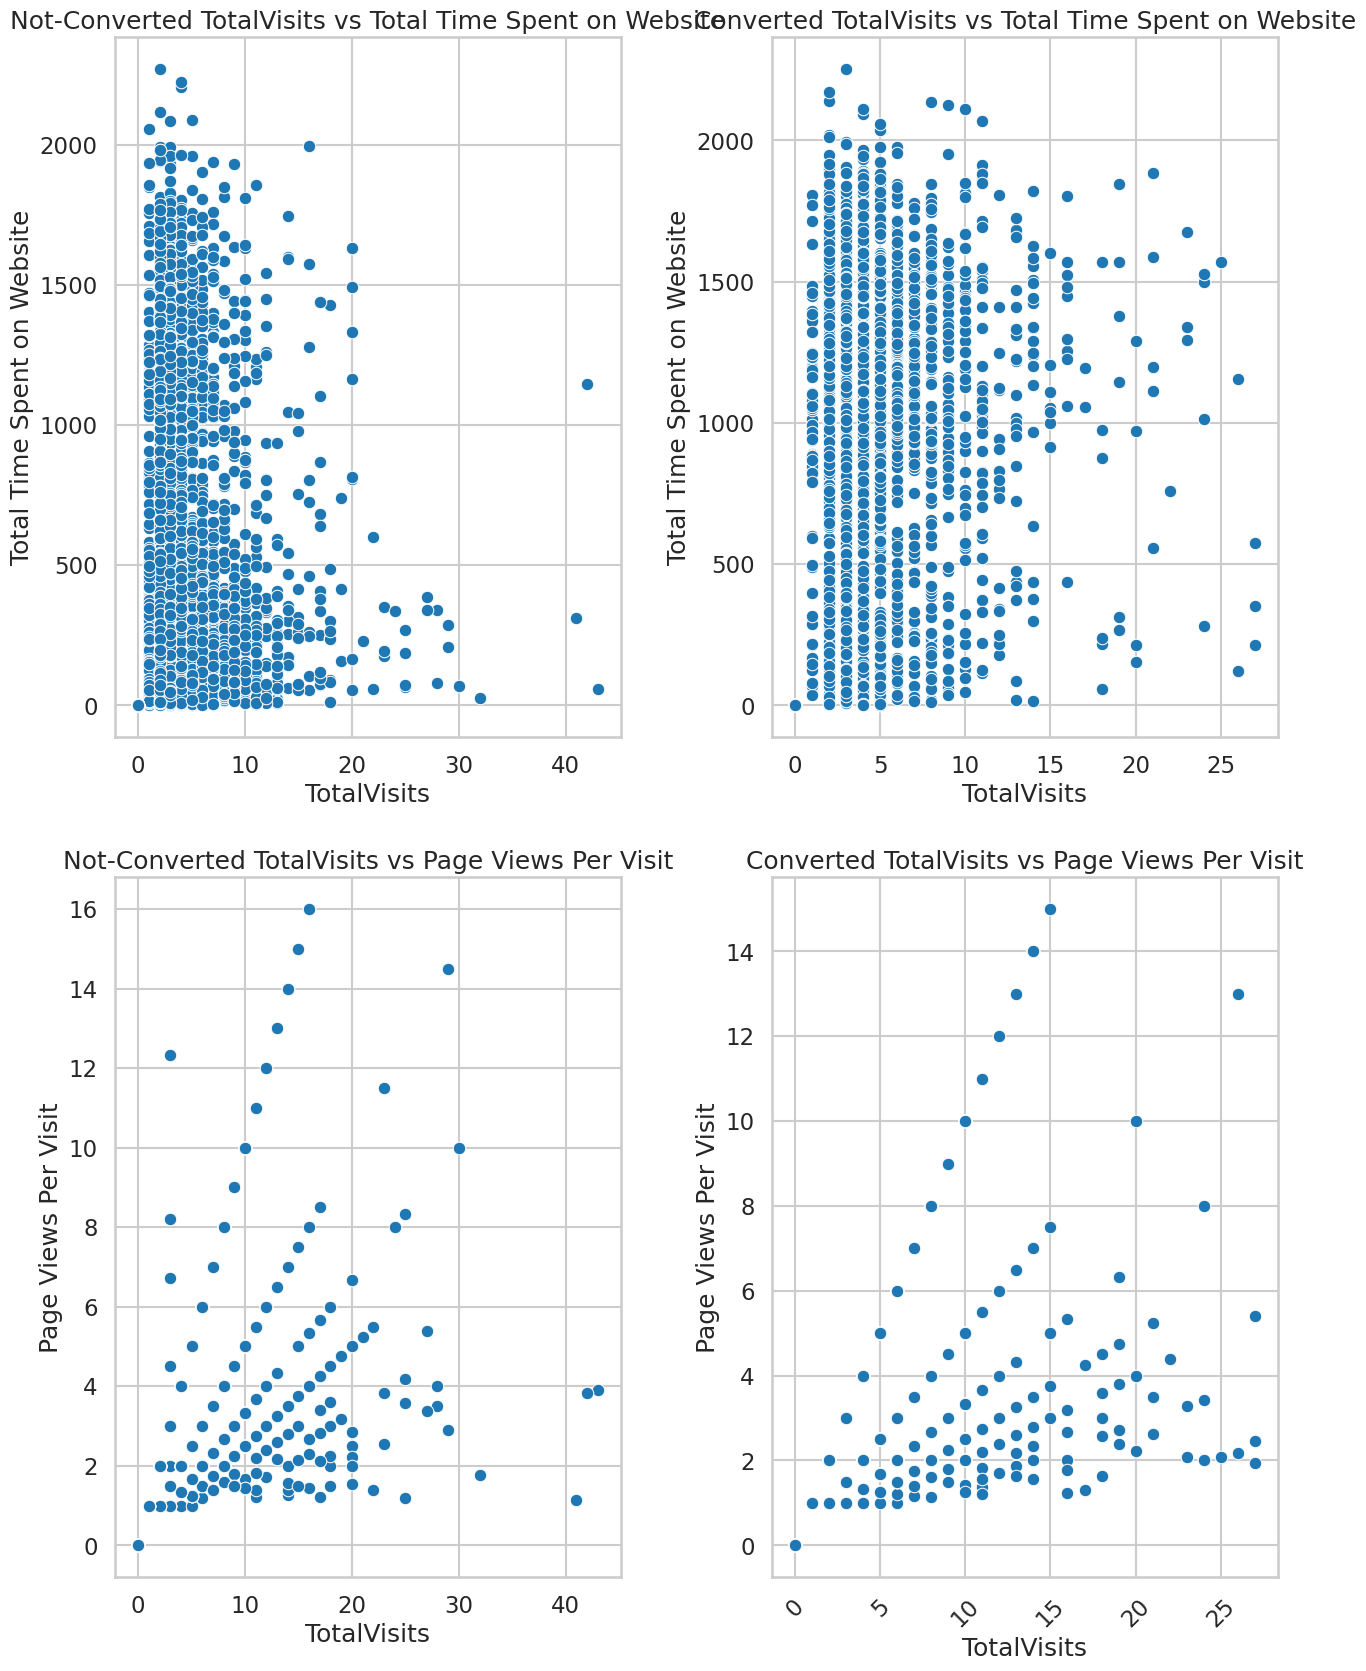

In [33]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(x=not_converted['TotalVisits'], y=not_converted['Total Time Spent on Website'])
plt.title('Not-Converted TotalVisits vs Total Time Spent on Website')

plt.subplot(2,2,2)
sns.scatterplot(x=converted['TotalVisits'], y=converted['Total Time Spent on Website'])
plt.title('Converted TotalVisits vs Total Time Spent on Website')


plt.subplot(2,2,3)
sns.scatterplot(x=not_converted['TotalVisits'], y=not_converted['Page Views Per Visit'])
plt.title('Not-Converted TotalVisits vs Page Views Per Visit')

plt.subplot(2,2,4)
sns.scatterplot(x=converted['TotalVisits'], y=converted['Page Views Per Visit'])
plt.title('Converted TotalVisits vs Page Views Per Visit')

plt.xticks(rotation = 45)
plt.show()

# We don't see any strong patter among the numerical variables

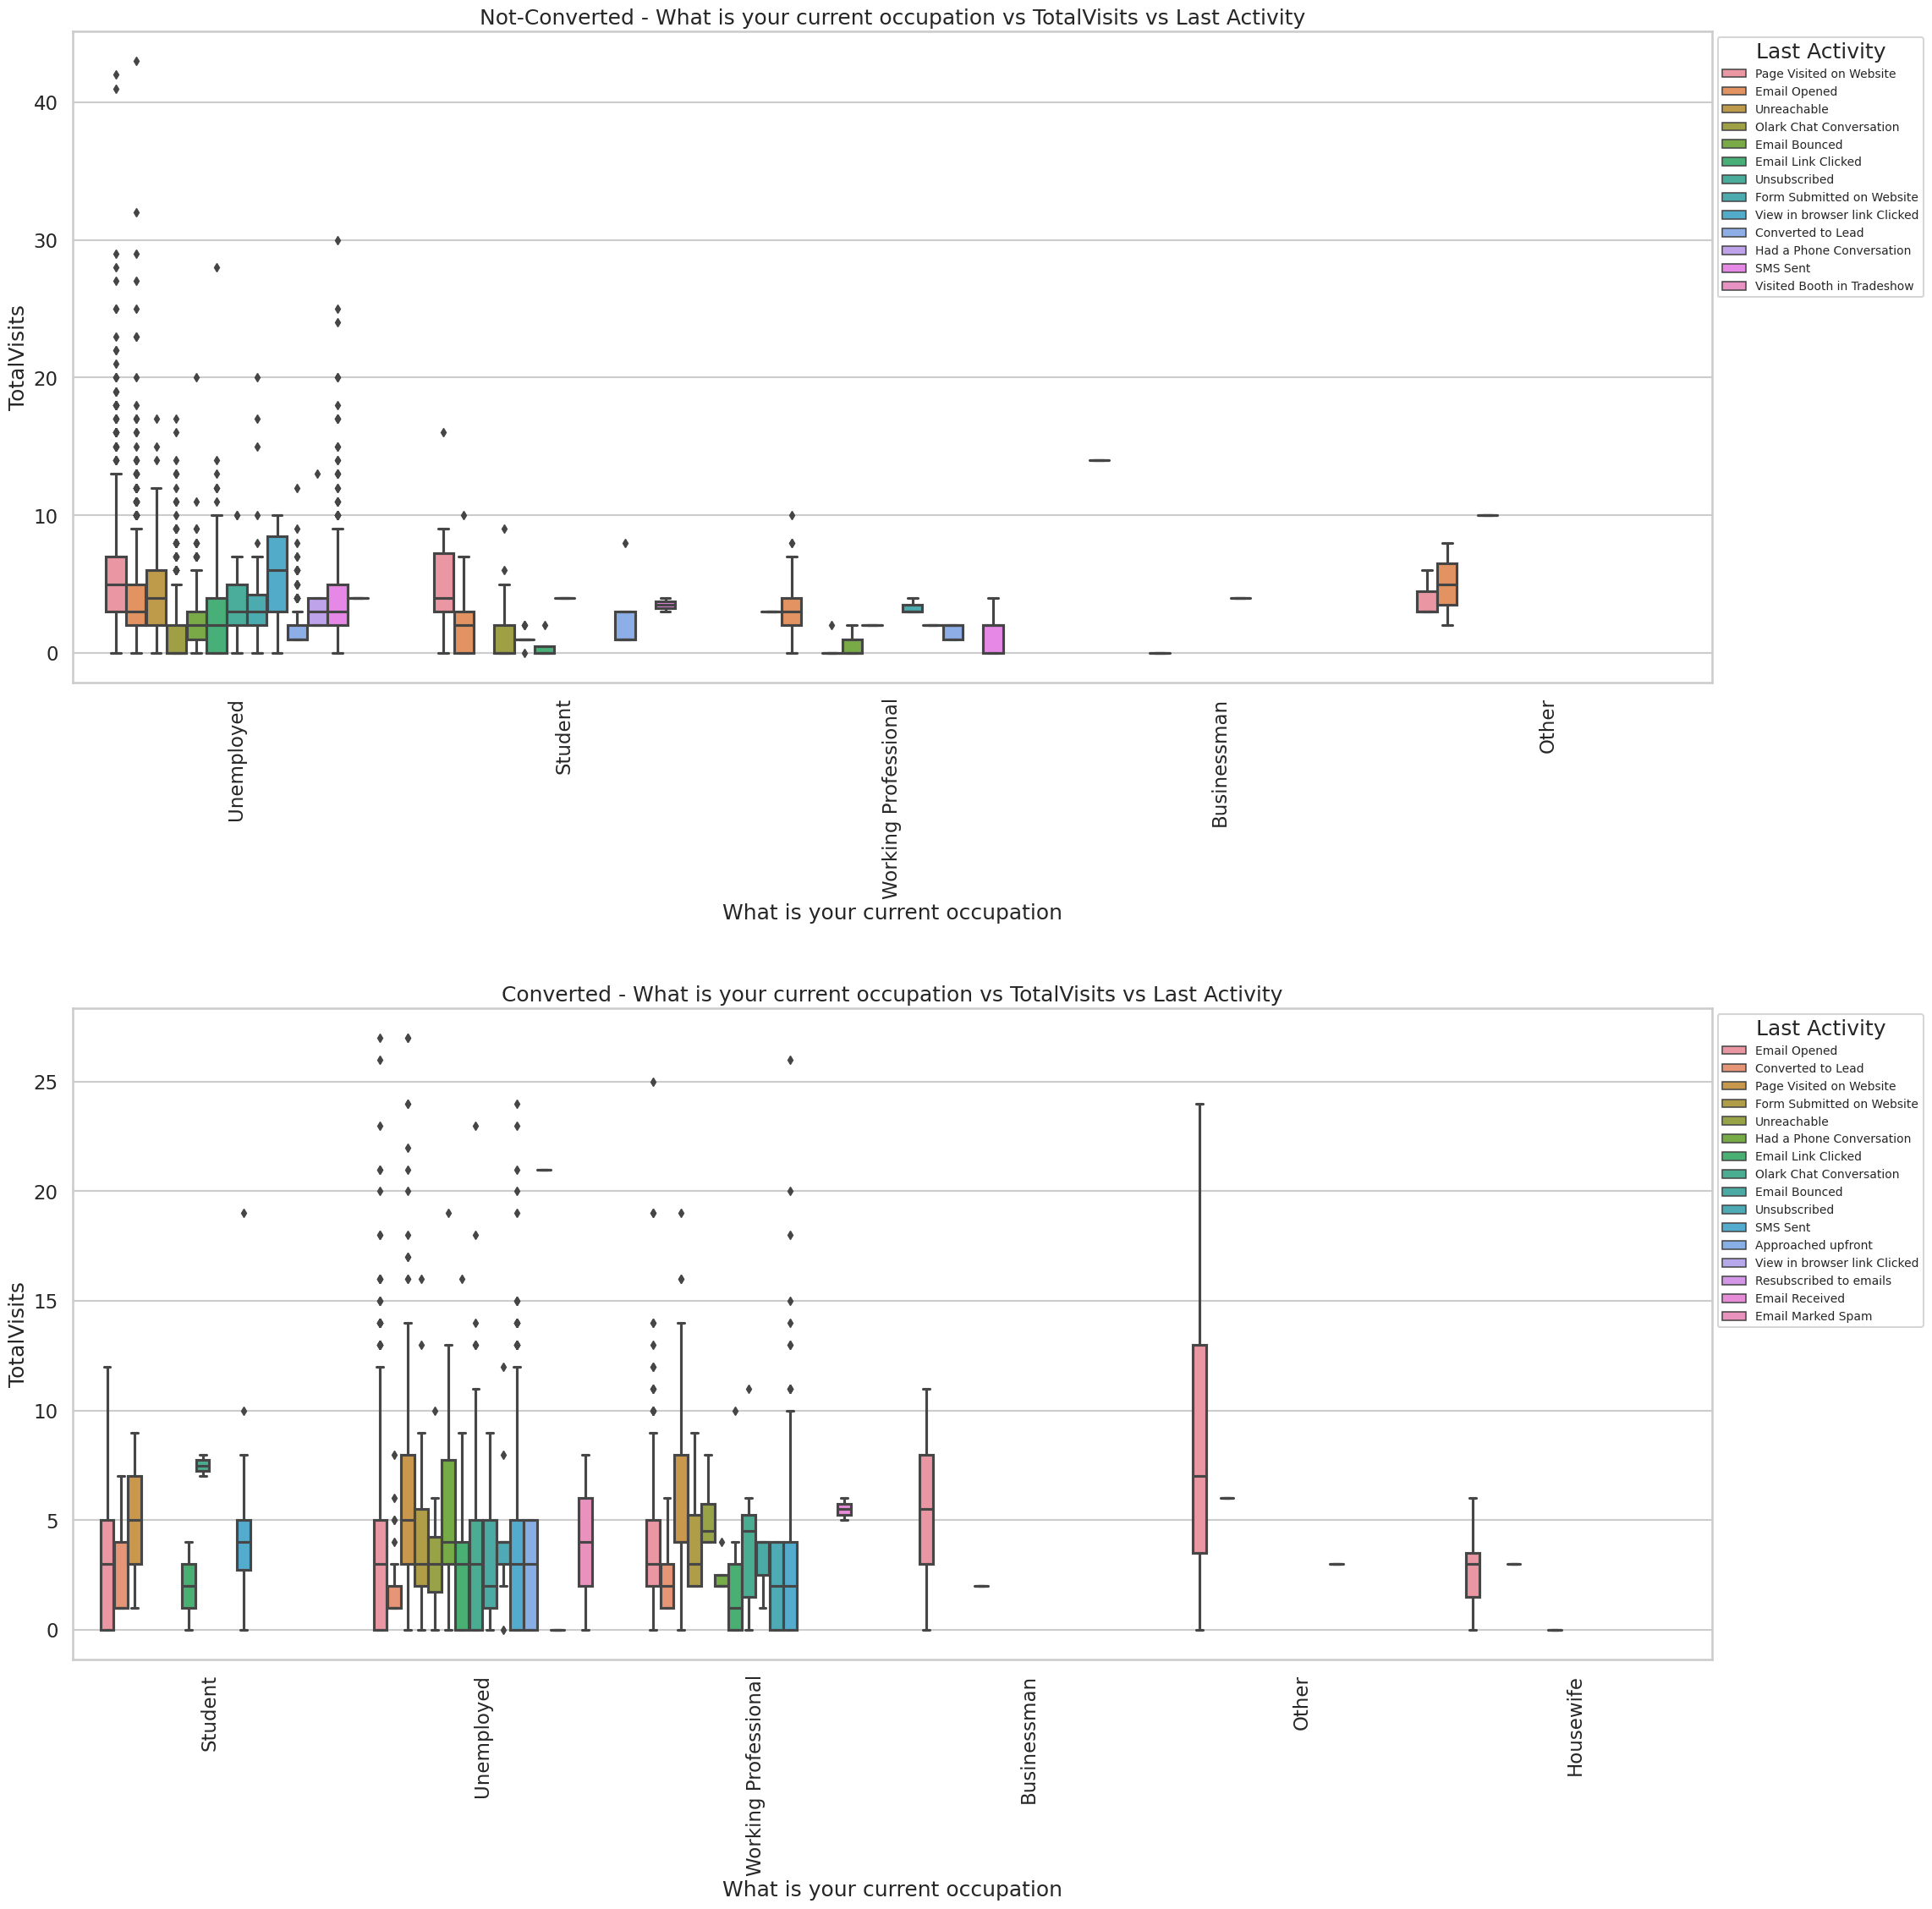

In [34]:
# Box plotting for What is your current occupation vs TotalVisits vs Last Activity

plt.figure(figsize=(25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2,1,1)
sns.boxplot(data=not_converted, x='What is your current occupation',y='TotalVisits', hue ='Last Activity',orient='v]')
plt.title('Not-Converted - What is your current occupation vs TotalVisits vs Last Activity')
plt.legend(title='Last Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 10)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(data=converted, x='What is your current occupation',y='TotalVisits', hue ='Last Activity',orient='v]')
plt.title('Converted - What is your current occupation vs TotalVisits vs Last Activity')
plt.legend(title='Last Activity', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 10)
plt.xticks(rotation=90)

plt.show()

# For leads that were not converted we see that house wife has no activity, working professional and others have lower total visits
# For leads that were converted we see house wife, businessman and others have opened emails and have higher total visits

# Drop irrelevant feature based on Analysis

In [35]:
# Dropping feature that are high biased towards a single values or seems irrelevant based on the analysis

leads = leads.drop(['Country'
,'Search'
,'Magazine'
,'Newspaper Article'
,'X Education Forums'
,'Newspaper'
,'Digital Advertisement'
,'Receive More Updates About Our Courses'
,'Update me on Supply Chain Content'
,'Get updates on DM Content'
,'I agree to pay the amount through cheque'
,'A free copy of Mastering The Interview'], 1)

In [36]:
# Check shape after dropping

leads.shape

(9074, 15)

In [37]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Through Recommendations', 'Tags',
       'City', 'Last Notable Activity'],
      dtype='object')

# Create dummies for categorical variables

In [38]:
leads.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                  Missing   
1             Email Opened                  Missing   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                  Missing   

  What is your current occupation  Through Recommendations  \
0                      Unemployed                        0   
1                      Unemployed                        0   
2                         Student                        0   
3                      Unemployed                        0   
4                      Unemployed                        0   

                                  Tags    City Last Notable Activity  
0          Interested in other courses  Mumbai              Modified  
1                              Ringing  Mumbai          Email Opened  
2  Will revert after reading the email  Mumbai          Email Opened  
3                              Ringing  Mumbai              Modified  
4  Will revert after reading the email  Mumbai              Modified

In [39]:
leads_dummies = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']], drop_first=True)
leads_dummies.shape

(9074, 108)

In [40]:
leads = pd.concat([leads, leads_dummies], axis=1)
leads.shape

(9074, 123)

In [41]:
# drop columns after creating dummies for them
leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity'], axis=1, inplace=True)

In [42]:
leads.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Through Recommendations  \
0                            0                   0.0                        0   
1                          674                   2.5                        0   
2                         1532                   2.0                        0   
3                          305                   1.0                        0   
4                         1428                   1.0                        0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \

# Split into train test

In [43]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Through Recommendations  \
0                   0.0                        0   
1                   2.5                        0   
2                   2.0                        0   
3                   1.0                        0   
4                   1.0                        0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                         0                    0   
1                         0                    0   
2                         0                    0   
3                         0                    0   
4                         0                    0   

   Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
0                             0                 0                 0   
1                             0                 0                 0   
2                             0                 0                 0   
3                             0                 0                 0   
4                             0                 0                 0   

   Lead Source_google  Lead Source_testone  Lead Source_welearnblog_Home  \
0                   0                    0                       

In [44]:
# Putting target variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [46]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3009             0            0    -0.399732                    -0.160255   
1012             1            0    -0.399732                    -0.540048   
9226             0            0    -0.973580                    -0.888650   
4750             0            0    -0.399732                     1.643304   
7987             0            0     0.461039                     2.017593   

      Page Views Per Visit  Through Recommendations  \
3009             -0.179522                        0   
1012             -0.179522                        0   
9226             -1.140456                        0   
4750             -0.179522                        0   
7987              0.060712                        0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3009                                    1                          0   
1012                                    1                          0   
9226                                    0                          0   
4750                                    1                          0   
7987                                    1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
3009                        0                           1   
1012                        0                           1   
9226                        0                           0   
4750                        0                           1   
7987                        0                           1   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
3009                     0                   0                      0   
1012                     0                   0                      0   
9226                     0                   0                      0   
4750                     0                   0                      0   
7987                     0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
3009                   0                       0                           0   
1012                   0                       0                           0   
9226                   0                       1                           0   
4750                   0                       0                           0   
7987                   0                       0                           0   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
3009                              0                          0   
1012                              0                          0   
9226                              0                          0   
4750                              0                          0   
7987                              0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
3009                      0                           0   
1012                      0                           0   
9226                      0                           0   
4750                      0                           0   
7987                      0                           0   

      Lead Source_Social Media  Lead Source_WeLearn  \
3009                         0                    0   
1012                         0                    0   
9226                         0                    0   
4750                         0                    0   
7987                         0                    0   

      Lead Source_Welingak Website  Lead Source_bing  Lead Source_blog  \
3009                             0                 0                 0   
1012                             0                 0                 0   
9226                             0                 0                 0   
4750                             0                 0                 0   
7987                             0     

# Multivariate Analysis

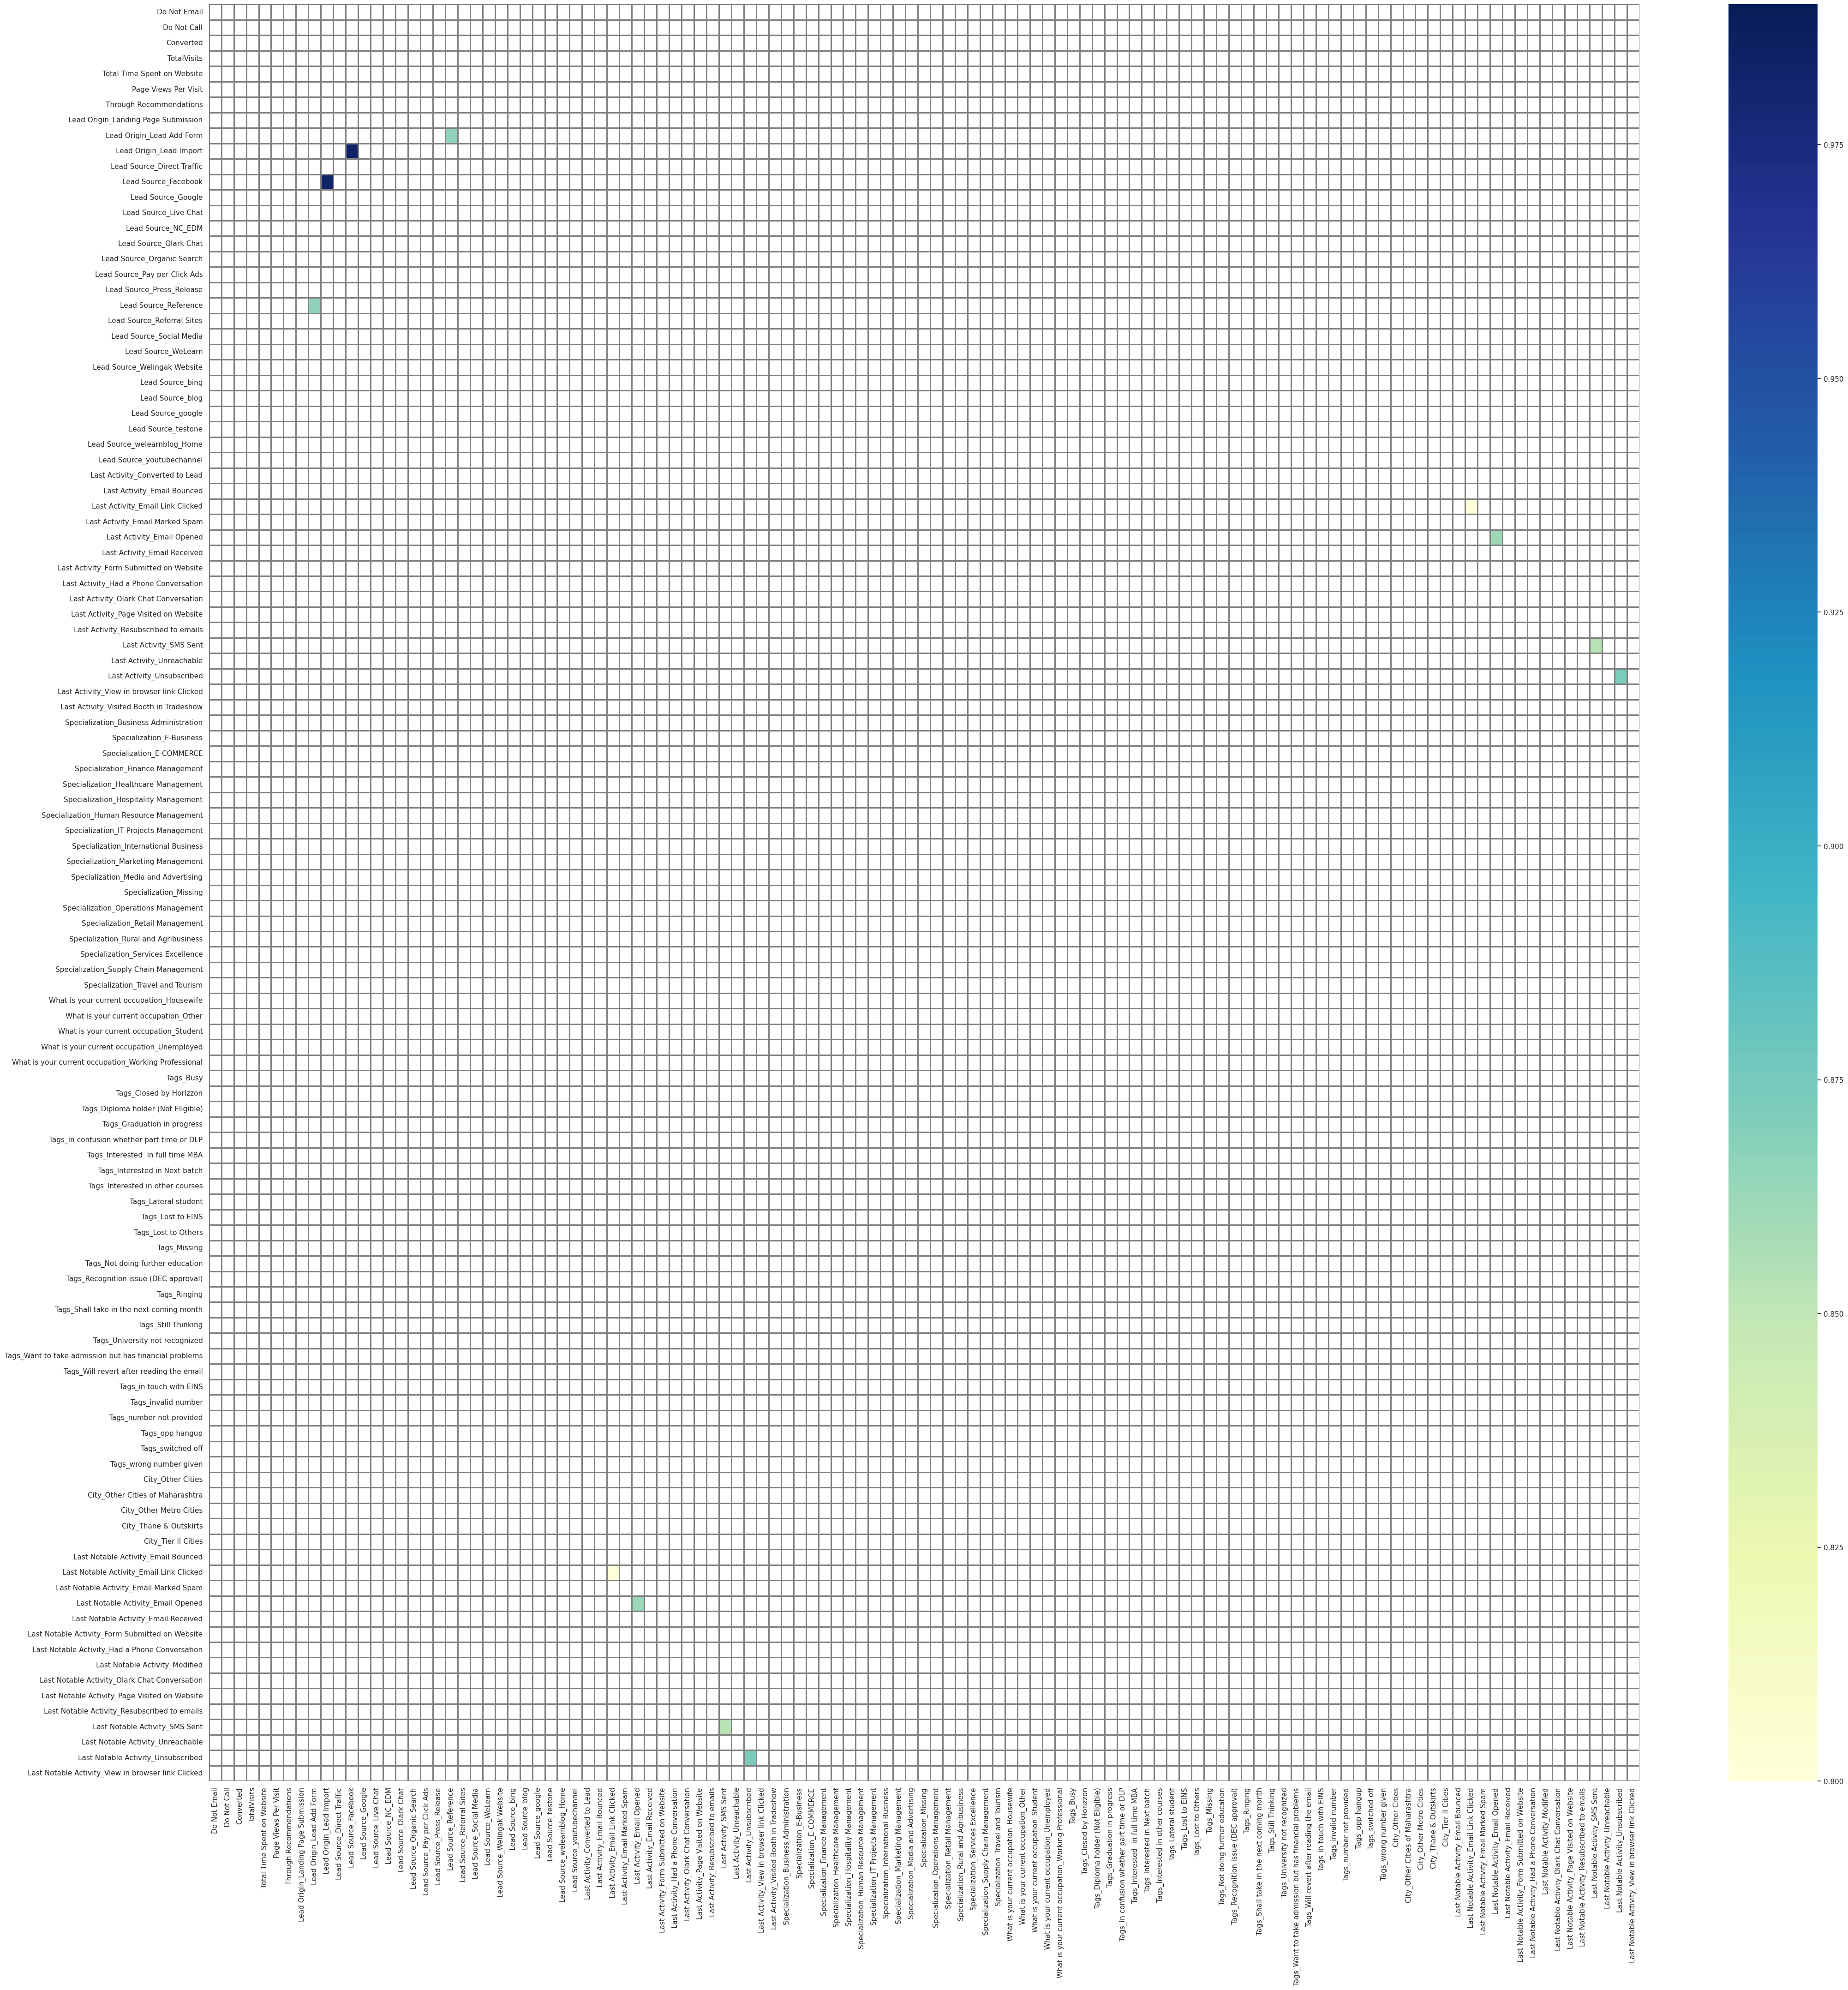

In [47]:
# We see there are quite a number of feature with collinearity greater than 80 percent
# We will handel them using RFE during our model building stage

from copy import copy
corr = leads.corr()

plt.figure(figsize=(50,50))
sns.set(font_scale=1)

my_cmap = copy(plt.cm.YlGnBu)
my_cmap.set_over("white")
my_cmap.set_under("white")

sns.heatmap(corr,
    vmin=0.8,
    vmax=0.99,
    cmap=my_cmap,
    linewidths=1.0,
    linecolor="grey")

plt.show()

# Feature seclection using RFE

In [48]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [49]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [50]:
# Check the feature ranking produced by rfe
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 76),
 ('TotalVisits', False, 56),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 57),
 ('Through Recommendations', False, 71),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 32),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Live Chat', False, 92),
 ('Lead Source_NC_EDM', False, 9),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 93),
 ('Lead Source_Press_Release', False, 82),
 ('Lead Source_Reference', False, 28),
 ('Lead Source_Referral Sites', False, 26),
 ('Lead Source_Social Media', False, 77),
 ('Lead Source_WeLearn', False, 95),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 50),
 ('Lead Source_blog', False, 44),
 ('Lead Source_googl

In [51]:
# Columns recommneded by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Missing', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Model building - Stats Model - Iteration 1

In [53]:
import statsmodels.api as sm

In [54]:
X_train_rfe = sm.add_constant(X_train_rfe)
logml = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()
print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1151.6
Date:                Sat, 24 Jun 2023   Deviance:                       2303.1
Time:                        16:26:42   Pearson chi2:                 9.62e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6211
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [55]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                           const  10.40
20                 Last Notable Activity_SMS Sent   4.86
6                          Last Activity_SMS Sent   4.20
13       Tags_Will revert after reading the email   2.39
11                                   Tags_Missing   2.15
4                       Lead Origin_Lead Add Form   1.76
12                                   Tags_Ringing   1.70
18                 Last Notable Activity_Modified   1.53
5                    Lead Source_Welingak Website   1.35
8                         Tags_Closed by Horizzon   1.32
2                     Total Time Spent on Website   1.29
3             Lead Origin_Landing Page Submission   1.27
16                              Tags_switched off   1.16
7                                       Tags_Busy   1.15
10                              Tags_Lost to EINS   1.12
1                                    Do Not Email   1.06
14                            Tags_invalid number   1.06
19  Last Notable Activity_Olark Chat Conversation   1.06
17                        Tags_wrong number given   1.03
15                       Tags_number not provided   1.02
9                            Tags_Lateral student   1.01

# Model building - Stats Model - Iteration 2

In [56]:
# In previous iteration we saw few columns with very high P values
# Lets rebuild our model by droping them one by one

X_train_rfe.drop("Tags_Lateral student", axis=1, inplace=True)

In [57]:
X_train_rfe = sm.add_constant(X_train_rfe)
logml = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()
print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1154.9
Date:                Sat, 24 Jun 2023   Deviance:                       2309.7
Time:                        16:26:42   Pearson chi2:                 9.72e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6207
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [58]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                           const  10.38
19                 Last Notable Activity_SMS Sent   4.85
6                          Last Activity_SMS Sent   4.19
12       Tags_Will revert after reading the email   2.38
10                                   Tags_Missing   2.14
4                       Lead Origin_Lead Add Form   1.76
11                                   Tags_Ringing   1.70
17                 Last Notable Activity_Modified   1.53
5                    Lead Source_Welingak Website   1.35
8                         Tags_Closed by Horizzon   1.32
2                     Total Time Spent on Website   1.29
3             Lead Origin_Landing Page Submission   1.27
15                              Tags_switched off   1.16
7                                       Tags_Busy   1.15
9                               Tags_Lost to EINS   1.12
1                                    Do Not Email   1.06
13                            Tags_invalid number   1.06
18  Last Notable Activity_Olark Chat Conversation   1.06
16                        Tags_wrong number given   1.03
14                       Tags_number not provided   1.02

# Model building - Stats Model - Iteration 3

In [59]:
# In previous iteration we saw few columns with very high P values
# Lets rebuild our model by droping them one by one

X_train_rfe.drop("Tags_invalid number", axis=1, inplace=True)

In [60]:
X_train_rfe = sm.add_constant(X_train_rfe)
logml = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()
print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1159.1
Date:                Sat, 24 Jun 2023   Deviance:                       2318.1
Time:                        16:26:43   Pearson chi2:                 9.68e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6202
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [61]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                           const  10.04
18                 Last Notable Activity_SMS Sent   4.85
6                          Last Activity_SMS Sent   4.19
12       Tags_Will revert after reading the email   2.31
10                                   Tags_Missing   2.06
4                       Lead Origin_Lead Add Form   1.76
11                                   Tags_Ringing   1.65
16                 Last Notable Activity_Modified   1.53
5                    Lead Source_Welingak Website   1.35
8                         Tags_Closed by Horizzon   1.31
2                     Total Time Spent on Website   1.29
3             Lead Origin_Landing Page Submission   1.27
14                              Tags_switched off   1.15
7                                       Tags_Busy   1.14
9                               Tags_Lost to EINS   1.11
1                                    Do Not Email   1.06
17  Last Notable Activity_Olark Chat Conversation   1.06
15                        Tags_wrong number given   1.03
13                       Tags_number not provided   1.02

# Model building - Stats Model - Iteration 4

In [62]:
# In previous iteration we saw few columns with very high P values
# Lets rebuild our model by droping them one by one

X_train_rfe.drop("Tags_wrong number given", axis=1, inplace=True)

In [63]:
X_train_rfe = sm.add_constant(X_train_rfe)
logml = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()
print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1162.4
Date:                Sat, 24 Jun 2023   Deviance:                       2324.9
Time:                        16:26:44   Pearson chi2:                 9.66e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6198
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [64]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                           const  9.90
17                 Last Notable Activity_SMS Sent  4.85
6                          Last Activity_SMS Sent  4.19
12       Tags_Will revert after reading the email  2.27
10                                   Tags_Missing  2.02
4                       Lead Origin_Lead Add Form  1.76
11                                   Tags_Ringing  1.63
15                 Last Notable Activity_Modified  1.53
5                    Lead Source_Welingak Website  1.35
8                         Tags_Closed by Horizzon  1.30
2                     Total Time Spent on Website  1.29
3             Lead Origin_Landing Page Submission  1.27
7                                       Tags_Busy  1.14
14                              Tags_switched off  1.14
9                               Tags_Lost to EINS  1.11
16  Last Notable Activity_Olark Chat Conversation  1.06
1                                    Do Not Email  1.05
13                       Tags_number not provided  1.02

# Model building - Stats Model - Iteration 5

In [65]:
# In previous iteration we saw few columns with very high P values
# Lets rebuild our model by droping them one by one

X_train_rfe.drop("Tags_number not provided", axis=1, inplace=True)

In [66]:
X_train_rfe = sm.add_constant(X_train_rfe)
logml = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()
print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1164.2
Date:                Sat, 24 Jun 2023   Deviance:                       2328.4
Time:                        16:26:44   Pearson chi2:                 9.66e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6196
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [67]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                           const  9.81
16                 Last Notable Activity_SMS Sent  4.85
6                          Last Activity_SMS Sent  4.19
12       Tags_Will revert after reading the email  2.25
10                                   Tags_Missing  2.00
4                       Lead Origin_Lead Add Form  1.76
11                                   Tags_Ringing  1.61
14                 Last Notable Activity_Modified  1.52
5                    Lead Source_Welingak Website  1.35
8                         Tags_Closed by Horizzon  1.30
2                     Total Time Spent on Website  1.29
3             Lead Origin_Landing Page Submission  1.27
13                              Tags_switched off  1.14
7                                       Tags_Busy  1.13
9                               Tags_Lost to EINS  1.11
15  Last Notable Activity_Olark Chat Conversation  1.06
1                                    Do Not Email  1.05

# Model building - Stats Model - Iteration 6

In [68]:
# In previous iteration we saw few columns with very high P values
# Lets rebuild our model by droping them one by one

X_train_rfe.drop("Lead Origin_Lead Add Form", axis=1, inplace=True)

In [69]:
X_train_rfe = sm.add_constant(X_train_rfe)
logml = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()
print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1166.2
Date:                Sat, 24 Jun 2023   Deviance:                       2332.4
Time:                        16:26:44   Pearson chi2:                 9.57e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6193
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [70]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                           const  9.70
15                 Last Notable Activity_SMS Sent  4.85
5                          Last Activity_SMS Sent  4.16
11       Tags_Will revert after reading the email  2.14
9                                    Tags_Missing  1.99
10                                   Tags_Ringing  1.61
13                 Last Notable Activity_Modified  1.52
2                     Total Time Spent on Website  1.21
3             Lead Origin_Landing Page Submission  1.19
7                         Tags_Closed by Horizzon  1.17
12                              Tags_switched off  1.14
6                                       Tags_Busy  1.13
8                               Tags_Lost to EINS  1.10
14  Last Notable Activity_Olark Chat Conversation  1.06
1                                    Do Not Email  1.05
4                    Lead Source_Welingak Website  1.05

# Model building - Stats Model - Iteration 7

In [71]:
# Now the PE value is well within the threshold
# now lets check the VIF and eliminate features with high VIF

X_train_rfe.drop("Last Notable Activity_SMS Sent", axis=1, inplace=True)

In [72]:
X_train_rfe = sm.add_constant(X_train_rfe)
logml = sm.GLM(y_train, X_train_rfe, family=sm.families.Binomial()).fit()
print(logml.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1172.9
Date:                Sat, 24 Jun 2023   Deviance:                       2345.8
Time:                        16:26:45   Pearson chi2:                 9.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6185
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [73]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                                           const  9.28
11       Tags_Will revert after reading the email  2.14
9                                    Tags_Missing  1.99
10                                   Tags_Ringing  1.61
2                     Total Time Spent on Website  1.21
13                 Last Notable Activity_Modified  1.20
3             Lead Origin_Landing Page Submission  1.19
5                          Last Activity_SMS Sent  1.17
7                         Tags_Closed by Horizzon  1.17
12                              Tags_switched off  1.14
6                                       Tags_Busy  1.13
8                               Tags_Lost to EINS  1.10
1                                    Do Not Email  1.05
4                    Lead Source_Welingak Website  1.05
14  Last Notable Activity_Olark Chat Conversation  1.05

# Predection

In [74]:
# Getting the predicted values on the train set
y_train_pred = logml.predict(X_train_rfe)
y_train_pred[:10]

3009    0.108753
1012    0.027689
9226    0.007543
4750    0.863534
7987    0.998856
1281    0.997830
2880    0.055710
4971    0.981049
7536    0.997094
1248    0.033057
dtype: float64

In [75]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.10875276, 0.02768894, 0.00754262, 0.86353415, 0.99885587,
       0.99782979, 0.05571023, 0.98104904, 0.997094  , 0.03305709])

# Accuracy

In [76]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Identifier'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Identifier
0          0        0.108753        3009
1          0        0.027689        1012
2          0        0.007543        9226
3          1        0.863534        4750
4          1        0.998856        7987

In [77]:
# To calculate accuracy we will choose an arbitary cut off of 0.5 percent

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Identifier  predicted
0          0        0.108753        3009          0
1          0        0.027689        1012          0
2          0        0.007543        9226          0
3          1        0.863534        4750          1
4          1        0.998856        7987          1

In [78]:
# Confusion matrix

from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3761  144]
 [ 268 2178]]


In [79]:
# Let's check the overall accuracy.
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.935128326247835


In [80]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's check the overall accuracy.
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

# Sensitivity of our logistic regression model
print("Sensitivity / Recall : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value / Precision
print("Positive Predictive Value / Precision :",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Accuracy : 0.935128326247835
Sensitivity / Recall :  0.8904333605887162
Specificity :  0.963124199743918
False Positive Rate : 0.03687580025608195
Positive Predictive Value / Precision : 0.937984496124031
Negative predictive value : 0.933482253660958


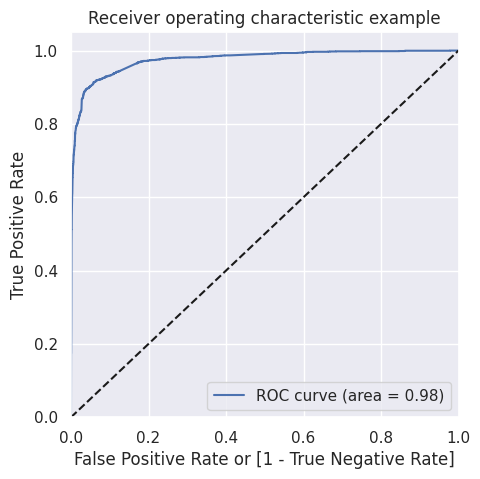

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [82]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Identifier  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.108753        3009          0    1    1    0    0    0   
1          0        0.027689        1012          0    1    0    0    0    0   
2          0        0.007543        9226          0    1    0    0    0    0   
3          1        0.863534        4750          1    1    1    1    1    1   
4          1        0.998856        7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    1    1    1    1    1

In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.858290  0.974244  0.785659
0.2   0.2  0.906629  0.938675  0.886556
0.3   0.3  0.925366  0.920687  0.928297
0.4   0.4  0.931192  0.904334  0.948015
0.5   0.5  0.935128  0.890433  0.963124
0.6   0.6  0.932137  0.871627  0.970038
0.7   0.7  0.917808  0.820932  0.978489
0.8   0.8  0.912297  0.793949  0.986428
0.9   0.9  0.898599  0.752249  0.990269


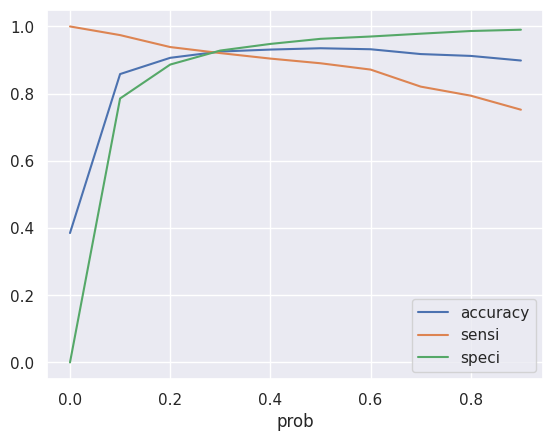

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [85]:
# Based on the above plot we will go with a cut off of 0.36
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Identifier  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.108753        3009          0    1    1    0    0    0   
1          0        0.027689        1012          0    1    0    0    0    0   
2          0        0.007543        9226          0    1    0    0    0    0   
3          1        0.863534        4750          1    1    1    1    1    1   
4          1        0.998856        7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    1    1    1    1    1                1

In [86]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

Converted  Converted_prob  Identifier  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.108753        3009          0    1    1    0    0    0   
1          0        0.027689        1012          0    1    0    0    0    0   
2          0        0.007543        9226          0    1    0    0    0    0   
3          1        0.863534        4750          1    1    1    1    1    1   
4          1        0.998856        7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  Lead_Score  
0    0    0    0    0    0                0          11  
1    0    0    0    0    0                0           3  
2    0    0    0    0    0                0           1  
3    1    1    1    1    0                1          86  
4    1    1    1    1    1                1         100

# Model Evaluation

In [87]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.9308770272398047


In [88]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3678,  227],
       [ 212, 2234]])

In [89]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity / Recall : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

# Positive predictive value / Precision
print("Positive Predictive Value / Precision :",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity / Recall :  0.9133278822567457
Specificity : 0.9418693982074263
False Positive rate :  0.05813060179257362
Positive Predictive Value / Precision : 0.9077610727346607
Negative Predictive Value :  0.9455012853470437


In [90]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3761,  144],
       [ 268, 2178]])

In [91]:
# Precision
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

# Recall
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Precision :  0.937984496124031
Recall : 0.8904333605887162


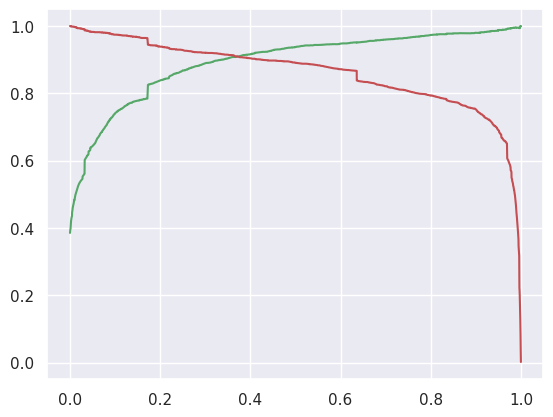

In [92]:
# Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Predicition on test set

In [93]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [94]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[X_train_rfe.columns[X_train_rfe.columns != 'const']]
X_test.head()

Do Not Email  Total Time Spent on Website  \
3271             0                    -0.600595   
1490             0                     1.887326   
7936             0                    -0.752879   
4216             0                    -0.888650   
3830             0                    -0.587751   

      Lead Origin_Landing Page Submission  Lead Source_Welingak Website  \
3271                                    0                             0   
1490                                    1                             0   
7936                                    0                             0   
4216                                    0                             0   
3830                                    1                             0   

      Last Activity_SMS Sent  Tags_Busy  Tags_Closed by Horizzon  \
3271                       0          0                        0   
1490                       0          0                        0   
7936                       0          0                        0   
4216                       0          0                        1   
3830                       0          0                        0   

      Tags_Lost to EINS  Tags_Missing  Tags_Ringing  \
3271                  0             1             0   
1490                  0             0             0   
7936                  0             1             0   
4216                  0             0             0   
3830                  0             1             0   

      Tags_Will revert after reading the email  Tags_switched off  \
3271                                         0                  0   
1490                                         1                  0   
7936                                         0                  0   
4216                                         0                  0   
3830                                         0                  0   

      Last Notable Activity_Modified  \
3271                               0   
1490                               0   
7936                               0   
4216                               1   
3830                               0   

      Last Notable Activity_Olark Chat Conversation  
3271                                              0  
1490                                              0  
7936                                              0  
4216                                              0  
3830                                              0

In [95]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = logml.predict(X_test_sm)
y_test_pred[:10]

3271    0.217066
1490    0.993161
7936    0.192115
4216    0.978994
3830    0.073481
1800    0.910597
6507    0.016626
4821    0.006030
4223    0.996225
4714    0.219608
dtype: float64

In [96]:
# Converting y_test_pred to a dataframe which is an array
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

0
3271  0.217066
1490  0.993161
7936  0.192115
4216  0.978994
3830  0.073481

In [97]:
# Converting y_test to dataframe
y_test = pd.DataFrame(y_test)
y_test['Identifier'] = y_test.index
y_test.head()

Converted  Identifier
3271          0        3271
1490          1        1490
7936          0        7936
4216          1        4216
3830          0        3830

In [98]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test, y_pred],axis=1)
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Identifier','Converted','Converted_prob'])
y_pred_final.head()

Identifier  Converted  Converted_prob
0        3271          0        0.217066
1        1490          1        0.993161
2        7936          0        0.192115
3        4216          1        0.978994
4        3830          0        0.073481

In [99]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.36 else 0)

In [100]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

# Making the confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

Accuracy : 0.919573999265516


array([[1618,  116],
       [ 103,  886]])

In [101]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

Identifier  Converted  Converted_prob  final_predicted  Lead_Score
0        3271          0        0.217066                0          22
1        1490          1        0.993161                1          99
2        7936          0        0.192115                0          19
3        4216          1        0.978994                1          98
4        3830          0        0.073481                0           7

In [102]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity / Recall : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

# Positive predictive value / Precision
print("Positive Predictive Value / Precision :",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Sensitivity / Recall :  0.8958543983822043
Specificity : 0.9331026528258363
False Positive rate :  0.06689734717416378
Positive Predictive Value / Precision : 0.8842315369261478
Negative Predictive Value :  0.9401510749564207


# Results

In [103]:
# Training set results

# Accuracy : 0.9308770272398047
# Sensitivity / Recall :  0.9133278822567457
# Specificity : 0.9418693982074263
# False Positive rate :  0.05813060179257362
# Positive Predictive Value / Precision : 0.9077610727346607
# Negative Predictive Value :  0.9455012853470437

# Test set results

# Accuracy : 0.919573999265516
# Sensitivity / Recall :  0.8958543983822043
# Specificity : 0.9331026528258363
# False Positive rate :  0.06689734717416378
# Positive Predictive Value / Precision : 0.8842315369261478
# Negative Predictive Value :  0.9401510749564207

# Looking at the results we can say our model is performing good which can predict with an accuracy greater than 85 percent.
# The model will help us identify leads where conversion rate is greater than 85 percent thereby reducing efforts on targets which are not likely to be converted.


# Important Features

In [104]:
logml.params.sort_values(ascending=False)

Tags_Closed by Horizzon                          9.224223
Tags_Lost to EINS                                8.359134
Tags_Will revert after reading the email         7.001878
Lead Source_Welingak Website                     4.656692
Tags_Busy                                        2.558532
Last Activity_SMS Sent                           2.130768
Tags_Missing                                     1.983805
Total Time Spent on Website                      1.007861
Do Not Email                                    -1.072319
Lead Origin_Landing Page Submission             -1.264499
Tags_switched off                               -1.544574
Last Notable Activity_Olark Chat Conversation   -1.579012
Tags_Ringing                                    -1.627858
Last Notable Activity_Modified                  -1.825553
const                                           -2.661336
dtype: float64

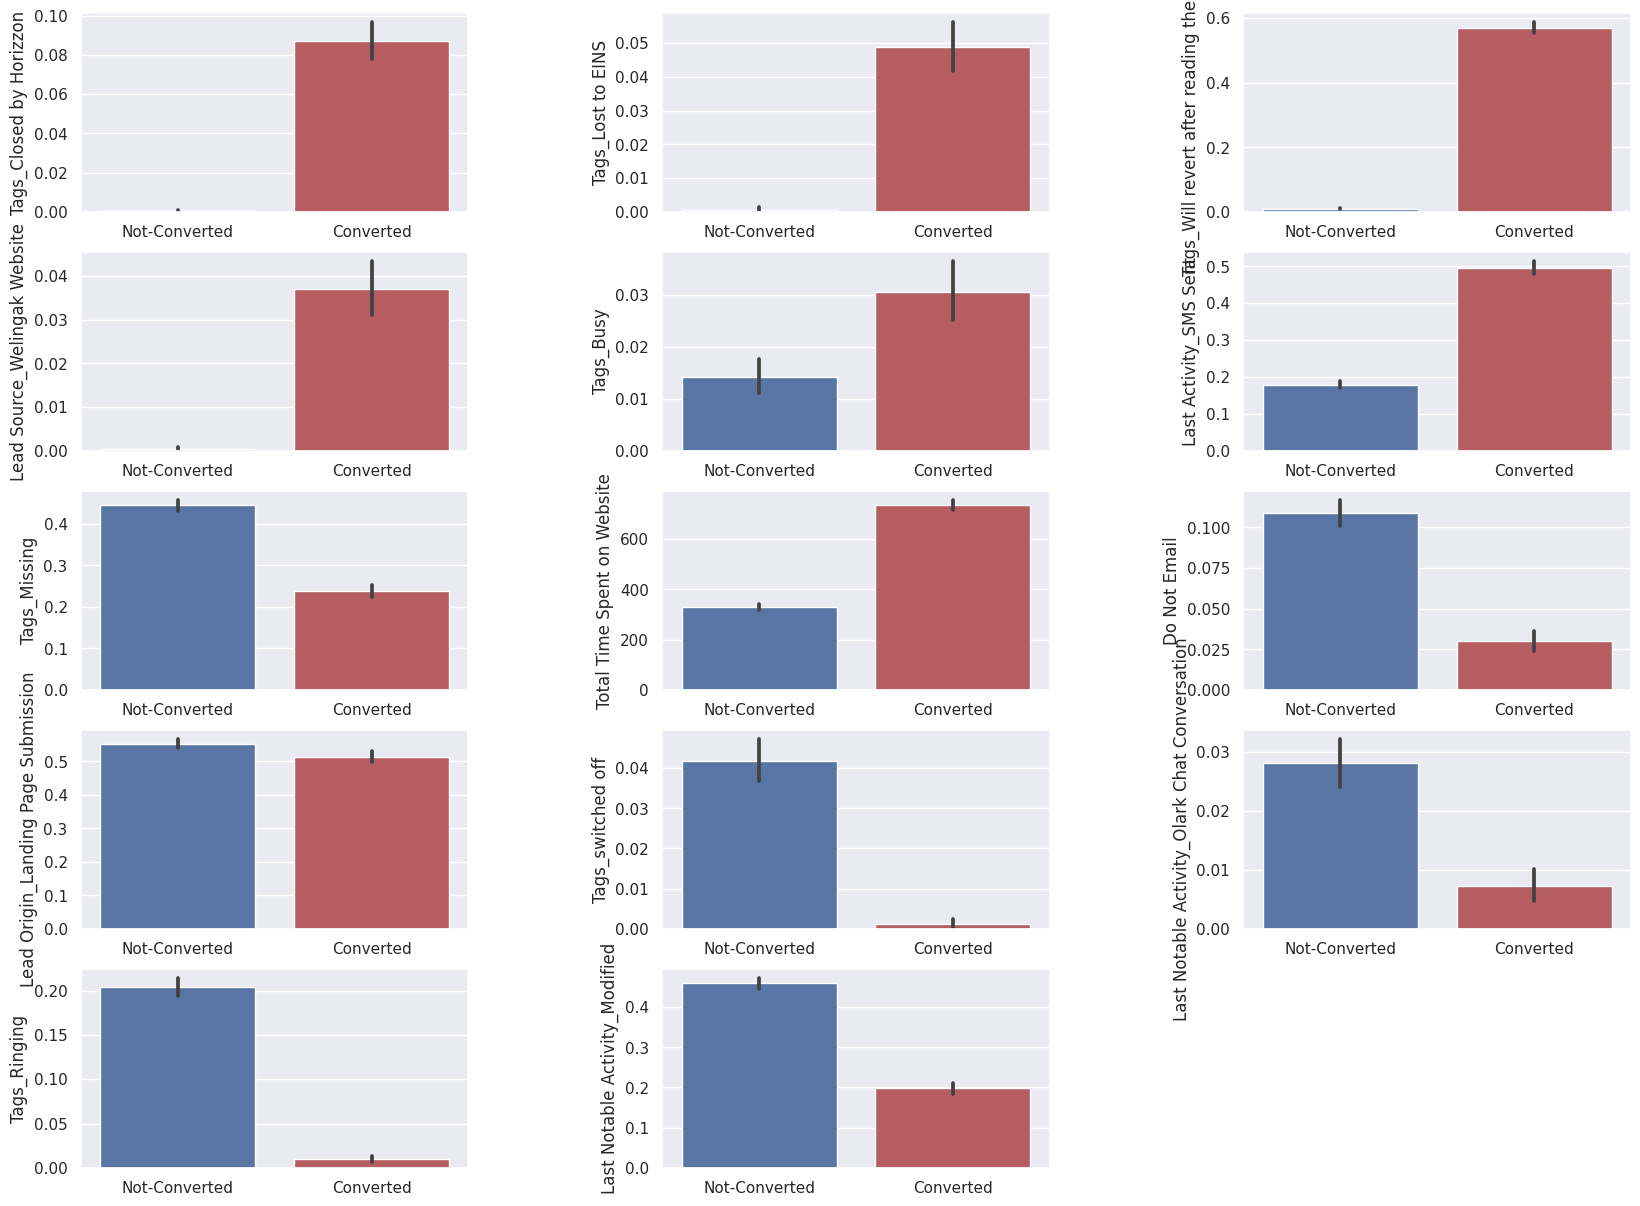

In [105]:
# Let check the conversion ration of numeric variables using bar plot

numeric_vars = ['Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Will revert after reading the email',
                'Lead Source_Welingak Website', 'Tags_Busy', 'Last Activity_SMS Sent',
                'Tags_Missing', 'Total Time Spent on Website', 'Do Not Email',
                'Lead Origin_Landing Page Submission', 'Tags_switched off',
                'Last Notable Activity_Olark Chat Conversation', 'Tags_Ringing', 'Last Notable Activity_Modified']
fig = plt.figure(figsize=(20,15))
for idx, item in enumerate(numeric_vars):
    plt.subplot(5,3,idx+1)
    plt.subplots_adjust(wspace=0.5)
    x=[0, 1]
    sns.barplot(data=leads , x="Converted", y=item, palette= ['b','r'])
    plt.xticks(x, ['Not-Converted', 'Converted'])
    plt.xlabel("")
plt.show()

# We see that Total time spent on website is high for the converted leads
# Page views per visit has no significant impact on conversion rate
# Total visit is marginally higher for converted leads